## How to convert Qualitative variable to Quantitative varible:

Linear regression with qualitative predictor:
* Applying the concept of Linear regression in dataset having qualitative predictors.
* The response variable is quantitative and predicted variable is qualitative.
* To apply linear regression, first we need to change qualitative predictor variable to quantitative variables.
* We can use panda library function get_dummmies encoding to convert qualitative variables into quantitative variables or we do manually for better understanding.<br>
   *How we can do manually* :
     *  If the dataset have only few qualitative variable then we can try and for understanding only.
     * Take qualitative predictor and find out how many types of option it carry like (yes/No), (Male/Female), (East/West/South).
     * Then we can assign a number to each option like (0/1) if there only two option.
     * If there are more than two option then we break them into further with new predictor can assign a number to each option like (0/1).
     * Then we can use these new predictor in our model.
     * As earlier we estimate coefficient for multiple linear regression same as we do.

     *How we can do using get_dummies* :
     * We can use get_dummies function from pandas library to convert qualitative predictor into quantitative predictor (Credit = pd.get_dummies(Credit, Columns= [Region, Own], drop_first = True) ).
     * get_dummies function will create new predictor for each option of qualitative predictor and assign boolean True or False.
     * We can change True or False into binary.
     * Then we can use these new predictor in our model.
     * As earlier we estimate coefficient for multiple linear regression same as we do.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def est_coeff(x, y):
    b1_num = 0
    b1_den = 0
    x_avg = np.average(x)
    y_avg = np.average(y)
    n = len(x)
    for j in range(n):
        b1_num += (x[j] - x_avg) * (y[j] - y_avg)
        b1_den += (x[j] - x_avg) ** 2
    b1 = b1_num / b1_den
    b0 = y_avg - b1 * x_avg
    return b0, b1

crd = pd.read_csv("Credit.csv")
#print(crd.head())
x1 = crd['Own']
y = crd['Balance']
pd.options.mode.copy_on_write = True


for i in range(len(x1)):
    if x1[i]== 'No':
        x1[i] = 0
    elif x1[i] == 'Yes':
        x1[i] = 1

b0, b1 = est_coeff(x1, y)

print(f"Intercept wrt to 'OWn' is", b0, "\nSlop is ", b1, "of  not own.")
x2 = crd['Region']

x2_i1 = x2.copy()
for i in range(len(x2)):
    
    if x2_i1[i] == 'South':
        x2_i1[i] = 1
    elif x2_i1[i] == 'West':
        x2_i1[i] = 0
    elif x2_i1[i] == 'East':
        x2_i1[i] = 0


x2_i2 = x2.copy()
for i in range(len(x2)):
    
    if x2_i2[i] == 'West':
        x2_i2[i] = 1
    elif x2_i2[i] == 'South':
        x2_i2[i] = 0
    elif x2_i2[i] == 'East':
        x2_i2[i] = 0

x2_new = np.array([np.ones(len(x2)), x2_i1, x2_i2], dtype=float).T
beta = (np.linalg.inv(x2_new.T.dot(x2_new)).dot(x2_new.T).dot(y)).T
print(f'\nThe value coefficient of "Region" of b0 is ',beta[0],'\nThe value of b1 is',beta[1])



Intercept wrt to 'OWn' is 509.8031088082902 
Slop is  19.733123075767743 of  not own.

The value coefficient of "Region" of b0 is  531.0 
The value of b1 is -12.502512562814106


## **Introduction: Logistic Regression vs K-Nearest Neighbors (KNN)**

In this, we aim to study and compare two widely used classification algorithms — **Logistic Regression** and **K-Nearest Neighbors (KNN)** on dataset heart.csv.

### What We Will Do:

- First, we will implement **Logistic Regression** model in three stages:
  1. Using one predictor (feature),
  2. Using two predictors,
  3. Using all predictors from the dataset.

- Then, we will follow the **same steps for KNN**, building models with:
  1. One predictor,
  2. Two predictors,
  3. All predictors.

### Final Comparison:

At the end of implementation, we will compare both models based on the following criteria:

- **Accuracy** of predictions,
- **Dataset complexity** handling,
- **Confusion Matrix** to understand classification results,
- **ROC Curve** to evaluate the performance visually.

This step-by-step approach will help to understand the strengths and weaknesses of both models and how they perform on different feature combinations.


# Study of Heart.csv dataset <br>
The data is related to heart disease. The data includes the following columns:
- **Age** : The age of the patient in years.
- **Sex** : The sex of the patient (male or female).
- **ChestPain** : The chest pain type.
- **RestBP** : The resting blood pressure in mmHg.
- **Chol** : The serum cholesterol in mg/dl. 
- **Fbs** : The fasting blood sugar in mg/dl.
- **RestECG** : The resting electrocardiogram results (0, 1, or 2)
- **MaxHR** : the highest number of beats per minute
- **ExAng** : ExeAngina,The exercise-induced angina (1 or 0)
- **Oldpeak** : The ST depression induced by exercise relative to rest
- **Slope** : The slope of the peak exercise ST segment
- **Ca** : The number of major vessels colored by fluoroscopy
- **Thal** : The thalassemia (fixed , normal, reversible)
- **AHD** (Target) : Arteriosclerotic Heart Disease or Arterial Heart Disease.

* In the dataset qualitative predictors are ['ChestPain', 'Thal'] and also response variable ['AHD']
* The target variable (Yes/No) change to (1 or 0) respectively indicating whether the patient has heart disease or not heart disease.

In [17]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns


heart = pd.read_csv('Heart.csv')



print(heart.info)

print(heart.describe)
heart.head()

<bound method DataFrame.info of      Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### Correlation Matrix:
The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The correlation coefficient ranges from -1 to 1, where 1 means perfect positive correlation, -1 means perfect negative correlation, and 0 means no correlation. <br>
1. As we study heart.csv data found that 'ChestPain' , 'Thal' and 'AHD' so for logistic regression we have to changes those qualitative data to quantitative data.Each varible have more than two qualitative inputes variables and assign new column so we break in that respective inputes and assign 0 or 1 as respect.
2. Making a data qualitative to quantitative (by manually) and then plot its correlation matrix.We have to check the correlation between the independent variables and the dependent (AHD) variable.
3. From the correlation matrix **Thal_normal** has *-0.524972* highest negative correlation with AHD and second highest is **ChestPain_asymptomatic** has *0.507035* positive correlation with AHD.


297
AHD                       1.000000
ChestPain_asymptomatic    0.507035
Thal_reversable           0.484657
Ca                        0.463189
Oldpeak                   0.424052
ExAng                     0.421355
Slope                     0.333049
Sex                       0.278467
Age                       0.227075
RestECG                   0.166343
RestBP                    0.153490
Thal_fixed                0.104651
Chol                      0.080285
Fbs                       0.003167
ChestPain_typical        -0.091208
ChestPain_nontypical     -0.247535
ChestPain_nonanginal     -0.305345
MaxHR                    -0.423817
Thal_normal              -0.524972
Name: AHD, dtype: float64


,Age,Sex,ChestPain_typical,ChestPain_nontypical,ChestPain_nonanginal,ChestPain_asymptomatic,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal_fixed,Thal_normal,Thal_reversable,AHD
0,63,1,1.0,0.0,0.0,0.0,145,233,1,2,150,0,2.3,3,0.0,1.0,0.0,0.0,0
1,67,1,0.0,0.0,0.0,1.0,160,286,0,2,108,1,1.5,2,3.0,0.0,1.0,0.0,1
2,67,1,0.0,0.0,0.0,1.0,120,229,0,2,129,1,2.6,2,2.0,0.0,0.0,1.0,1
3,37,1,0.0,0.0,1.0,0.0,130,250,0,0,187,0,3.5,3,0.0,0.0,1.0,0.0,0
4,41,0,0.0,1.0,0.0,0.0,130,204,0,2,172,0,1.4,1,0.0,0.0,1.0,0.0,0


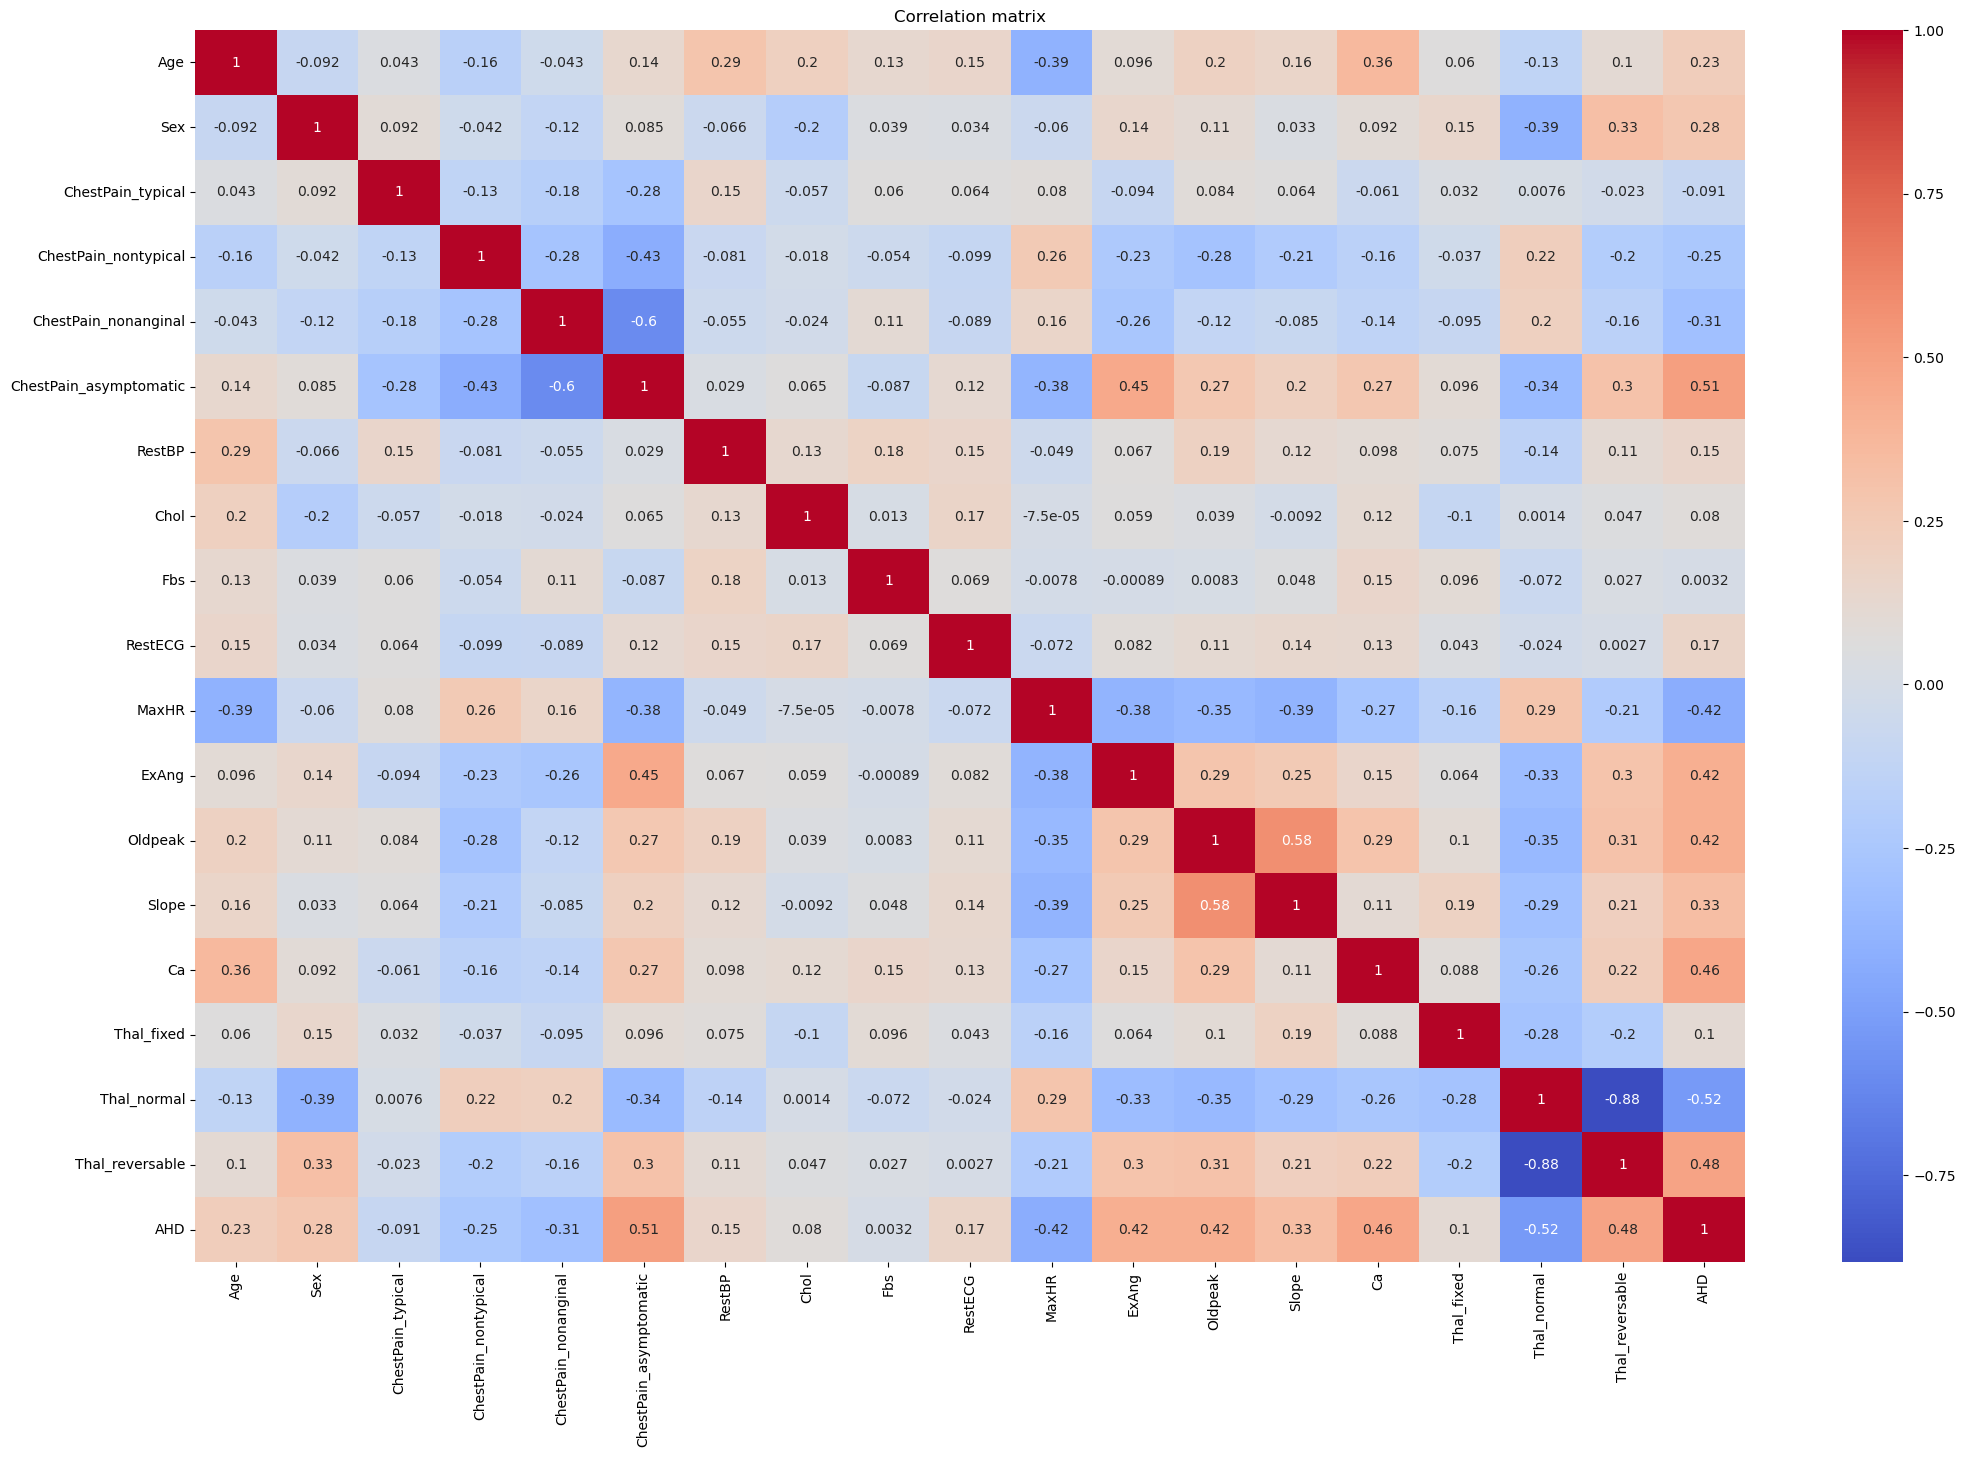

In [18]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns


heart = pd.read_csv('Heart.csv')
heart = heart.dropna()
print(len(heart['Age']))

ChestPain_typical = np.zeros(len(heart['Age']))
ChestPain_nontypical = np.zeros(len(heart['Age']))
ChestPain_nonanginal = np.zeros(len(heart['Age']))
ChestPain_asymptomatic = np.zeros(len(heart['Age']))

Thal_fixed = np.zeros(len(heart['Age']))
Thal_normal = np.zeros(len(heart['Age']))
Thal_reversable = np.zeros(len(heart['Age']))


heart["AHD"] = heart["AHD"].map({'Yes' : 1, 'No' : 0})
        


for i in range(len(heart['Age'])):
    #Changing the quantitative to qualitative    # we can use inbuild function heart = pd.get_dummies(heart, columns = ['chestPain', 'Thal'], drop_first = True)
    if heart['ChestPain'].iloc[i] == 'typical':
        ChestPain_typical[i]= 1
        ChestPain_asymptomatic[i] =0
        ChestPain_nontypical[i] =0
        ChestPain_nonanginal[i] = 0
    
    elif heart['ChestPain'].iloc[i] == 'asymptomatic':
        ChestPain_typical[i]=0
        ChestPain_asymptomatic[i] =1
        ChestPain_nontypical[i] =0
        ChestPain_nonanginal[i] = 0
        
    elif heart['ChestPain'].iloc[i] == 'nontypical':
        ChestPain_typical[i]=0
        ChestPain_asymptomatic[i] =0
        ChestPain_nontypical[i] =1
        ChestPain_nonanginal[i] = 0
        
    elif heart['ChestPain'].iloc[i] == 'nonanginal':
        ChestPain_typical[i]=0
        ChestPain_asymptomatic[i] =0
        ChestPain_nontypical[i] =0
        ChestPain_nonanginal[i] = 1
        
    if heart['Thal'].iloc[i] == 'fixed':
        Thal_fixed[i] = 1
        Thal_normal[i] = 0
        Thal_reversable[i] = 0
        
    elif heart['Thal'].iloc[i] == 'normal':
        Thal_fixed[i] = 0
        Thal_normal[i] = 1
        Thal_reversable[i] = 0
        
    elif heart['Thal'].iloc[i] == 'reversable':
        Thal_fixed[i] = 0
        Thal_normal[i] = 0
        Thal_reversable[i] = 1
        

#pd.options.mode.copy_on_write = True 

        
heart['ChestPain_typical'] = ChestPain_typical
heart['ChestPain_nontypical'] = ChestPain_nontypical
heart['ChestPain_nonanginal'] = ChestPain_nonanginal
heart['ChestPain_asymptomatic'] = ChestPain_asymptomatic

heart['Thal_fixed'] = Thal_fixed
heart['Thal_normal'] = Thal_normal
heart['Thal_reversable'] = Thal_reversable

heart = heart[['Age', 'Sex' , 'ChestPain_typical', 'ChestPain_nontypical', 'ChestPain_nonanginal', 'ChestPain_asymptomatic','RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca',  'Thal_fixed', 'Thal_normal', 'Thal_reversable', 'AHD' ]]


cor_rel = heart.corr()
k,l = subplots(figsize = (25,16))
sns.heatmap(cor_rel, annot= True, cmap='coolwarm' )
l.set_title('Correlation matrix')

cor = cor_rel['AHD'].sort_values(ascending= False)
print(cor)


#plotting of all correlation graphs
# fig, ax = subplots(19,19, figsize = (25,25))
# for i in range(19):
#     for j in range(19):
#         if i == j:
#             pass
            
#         else:
#             ax[i,j].scatter(heart[p[i]], heart[p[j]])
#             #ax[i,j].set_title(f'{p[i]} vs {p[j]}')
#             ax[i,j].set_xlabel(p[j])
#             ax[i,j].set_ylabel(p[i])

heart.head()


# Logistic Regression


1. **What is logistic Regression**
    * Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables
that determine an outcome.
    * The goal of logistic regression is to create a model that predicts the probability of
an event occurring given the values of the independent variables.
2. **What is the difference between Logistic Regression and Linear Regression?**
    * Logistic regression is used for classification problems where the target variable is categorical.
    * Linear regression is used for regression problems where the target variable is continuous.
3. **What is the purpose of the sigmoid function in Logistic Regression?**
    * The sigmoid function is used to map the output of the linear regression model to a probability between 0
and 1. It is used to convert the linear regression output into a probability output.
4. **How does it work?**
    * Logistic regression works by creating a model that maps the independent variables to a probability. The model is    
trained on a dataset in which the outcome is known, and the model learns to predict the probability of  
the outcome occurring given the values of the independent variables.
5. **How is it used in this case?**
    * In this case, logistic regression is used to predict the probability of a patient having a certain type of
heart disease (AHD) given the values of the independent variables (Age, Sex, ChestPain_typical, ChestPain_nonanginal, ChestPain_asymptomatic, RestBP
, Chol, Fbs, RestECG....Thal_fixed, Thal_normal, Thal_reversable, AHD....). <br>
    * In the logistic regression we using a function that gives output between 0 and 1 for all values of X.The logistic function is:
<br> ***Sigmoid function = 1 / (1 + e^(-z))*** where z = BX and B is a vector of model coefficients and X is the vector of one column of ones and predicted variable.
    * To fit the model we use a method called maximum likelihood.
    The estimation of B are chosen to maximize this likelihood function means maximizing the correctness of classification probability.
    * After estimating the coefficient we get the probability of each xi for every probability >0.5 as 1 and <= 0.5 as 0   hence get prediction.


### Simple Logistic Regression (***Thal_normal vs AHD***)
* From the correlation matrix **Thal_normal** has *-0.524972* highest negative correlation with AHD
* So, we apply Simple logistic Regression in predicted variable ***Thal_normal*** and response variable ***AHD***.
* We define function for sigmoid in which if we pass value of linear regression value it give probability of that hence prediction.
* For prediction we need coefficient which is calculated from maximizing log_likelihood function as we define a function for it which return likelihood function respect to beta , predictor(x), response(y) that passed to it.
* Rather than maximizing the likelihood function we minimize the negative of likelihood function which give same result and for minimizing this function we are using *result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )* where method is Newton's method of higher dimension that return the minimizer of negative log_likelihood function hence value of coefficient.
* After getting the coefficient we use it for prediction.
* We define the hessian for standard error calculation.
* From the standard error we calculate Confident Interval , z-statics = b/SE_b , p-value and also there hypothesis test.

**Plotting of prediction region of the model:**
* We plot actual response variable (y = AHD)  and predictor variable (x= Thal_normal)  in scatter form `scatter(x,y)` and plot predicted response varible (y_app) and predicted variable (x=Thal_normal) in line form `plot(x,y_app)`.
* Which show that the **region of prediction of model which is linear form in between 0 to 1**.

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We use heatmap to plot the confusion matrix.
<br>
* This matrix shows the number of correct and incorrect predictions by class:

|                 | Predicted: No | Predicted: Yes |
| --------------- | ------------- | -------------- |
| **Actual: No**  | TN            | FP             |
| **Actual: Yes** | FN            | TP             |
* Where TP is True Positive, FP is False Positive, TN is True Negative, FN is Falsse Negative.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)


*What are the results* <br>
The results show that the probability of a patient having AHD is lower when the thalassemmia is normal (thal_normal) compared to the other types of thalassemia. This    
indicates that the presence of thalassemia is a risk factor for AHD.


The results of the logistic regression model are as follows:

| Feature | Coefficient | Accuracy | p-value |
| --- | --- | --- | --- |   
| Thal_noram| 1.10, -2.34 | 76.43% | 3.3e-8, 1.3e-17 |



The value of coefficient is :
 b0 =  1.1086626729261746 
 b1 =  -2.3419317601988814
log-likehood max value : -162.07703734138155

The accuracy of the model is : 76.43097643097643 %
The standard error of the model is : 
 SE_b0 = 0.20075614881190973 
 SE_b1 = 0.27423360917895323

The confident Interval of b0 is: [ 0.7071503753023551 , 1.510174970549994 ]
The confident Interval of b1 is: [ -2.890398978556788 , -1.793464541840975 ]

z-static of b0 : 5.522434453377021
z-static of b1 -8.53991517382042

p-value of b0 : 3.3433454070181456e-08
p-value of b1 : 1.343204028973669e-17

 Hypothesis test result:
Reject the null hypothesis for b0
Reject the null hypothesis for b1


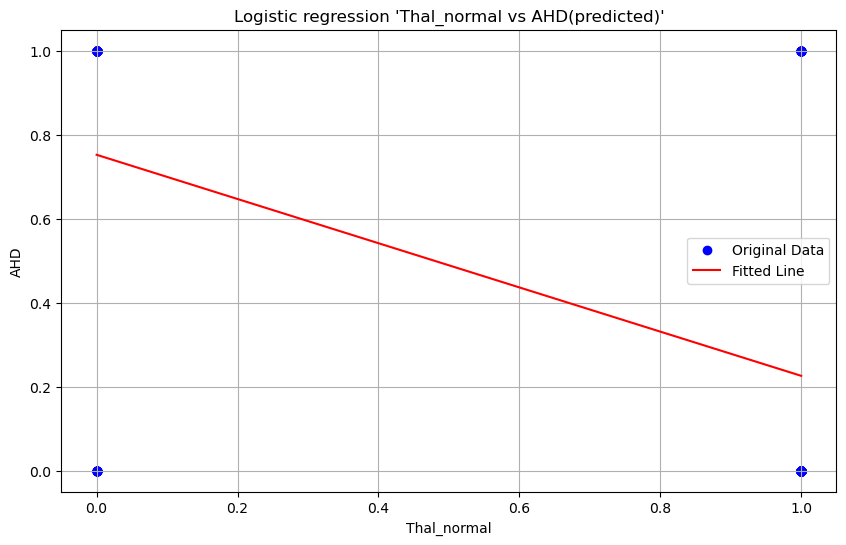

Confusion Matrix:
 [[127  37]
 [ 33 100]]


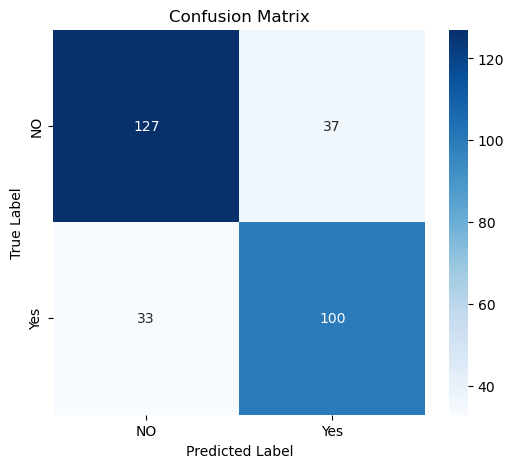

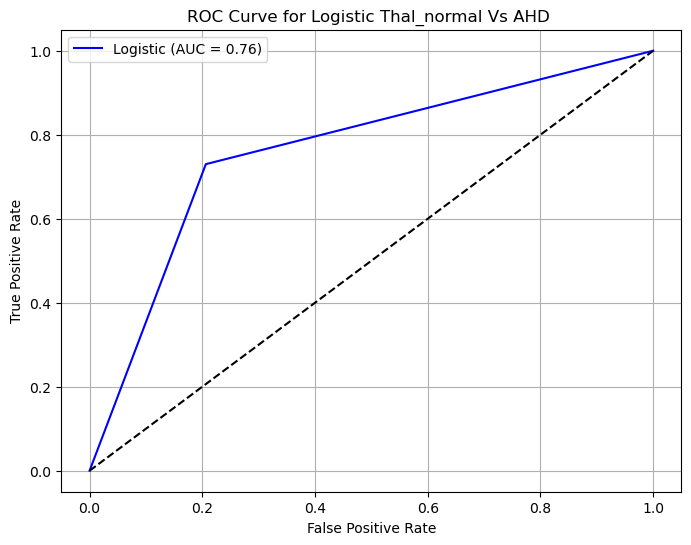

In [39]:

from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

y = heart['AHD']

x = heart['Thal_normal']
x_copy = x.copy()
#defining the sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

#define the negative log-likehood function
def log_likehood(beta, x, y):
    z = np.dot(x,beta)
    h = sigmoid(z)
    return -np.sum(y*np.log(h) + (1-y)*np.log(1-h))

#defining the hassian for standard error calculation
def hessian(beta, x):
    z = sigmoid(np.dot(x, beta))
    w = np.diag(z *(1-z))
    return -(np.dot(np.dot(x.T, w), x))    


x = np.column_stack((np.ones(len(x)), x))  # shape (297,2)

init_beta = np.zeros(x.shape[1]) # shape (2, 1)

#minimizing the negative log-likelihood function or maximizing the log-likehood function is same , there is inbuild function to minimize to i choose to minimize the negative log-likehood function
#minimizing the negative log-likelihood function

result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )
b0,b1 = result.x

print(f"The value of coefficient is :\n b0 = ",b0,"\n b1 = ", b1)

b = np.array([b0,b1])
k = np.dot(x,b)

y_app = sigmoid(k)
y_pre = sigmoid(k)


for i in range (len(y_app)):
    if y_app[i] > 0.5:
        y_app[i] = 1
    else:
        y_app[i] = 0
y_pre1 = y_app

print("log-likehood max value :",-log_likehood(b, x,y))

#calculating the accuracy of the model
accurcy = accuracy_score(y,y_app)
print("\nThe accuracy of the model is :",accurcy*100,"%")

#calculating the standard error
Hessian = hessian(b, x)
cov_matx = np.linalg.inv(-Hessian)
std_err = np.sqrt(np.diag(cov_matx))
SE_b0 , SE_b1 = std_err

print("The standard error of the model is : \n SE_b0 =",SE_b0, "\n SE_b1 =", SE_b1)

#Calculating Confident Interval 
CI_b0_l = b0 - 2*SE_b0
CI_b1_l = b1 - 2*SE_b1
CI_b0_u = b0 + 2*SE_b0
CI_b1_u = b1 + 2*SE_b1
print("\nThe confident Interval of b0 is: [", CI_b0_l,",",CI_b0_u,"]")
print("The confident Interval of b1 is: [", CI_b1_l,",",CI_b1_u,"]")

#Calculating z-statistic 
z_b0 = b0/SE_b0
z_b1 = b1/SE_b1
print("\nz-static of b0 :", z_b0)
print("z-static of b1", z_b1)

#Calculating the p-value
p_b0 = 2*norm.sf(abs(z_b0))
p_b1 = 2*norm.sf(abs(z_b1))
print("\np-value of b0 :", p_b0)
print("p-value of b1 :", p_b1)

#Hypothesis testing
#Null Hypothesis: b0 = 0 and b1 = 0
#Alternative Hypothesis: b0 != 0 or b1 != 0
print("\n Hypothesis test result:")
if p_b0<0.05:
    print("Reject the null hypothesis for b0")
else:
    print("Fail to reject the null hypothesis for b0")

if p_b1<0.05:
    print("Reject the null hypothesis for b1")
else:
    print("Fail to reject the null hypothesis for b1")
    
#plotting scatter(x,y) and plot(x,y_app)
plt.figure(figsize=(10,6))
plt.scatter(x_copy,y, color='blue', label='Original Data')
plt.plot(x_copy,y_pre, color='red', label='Fitted Line')
plt.xlabel("Thal_normal")
plt.ylabel("AHD")
plt.title("Logistic regression 'Thal_normal vs AHD(predicted)'")
plt.grid()
plt.legend()
plt.show()


confs_mtx= confusion_matrix(y_app, y)#confusion matrix
print("Confusion Matrix:\n", confs_mtx)

# Manually define  confusion matrix
cm = np.array(confs_mtx)

# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, thresholds = roc_curve(y, y_pre)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Thal_normal Vs AHD ')
plt.legend()
plt.grid(True)
plt.show()


### Simple Logistic Regression (***ChestPain_asymptomatic vs AHD***)
* From the correlation matrix has **0.507035** highest positive correlation with AHD
* So, we apply Simple logistic Regression in predicted variable ***ChestPain_asymptomatic*** and response variable ***AHD***.
* We define function for sigmoid in which if we pass value of linear regression value it give probability of that hence prediction.
* For prediction we need coefficient which is calculated from maximizing log_likelihood function as we define a function for it which return likelihood function respect to beta , predictor(x), response(y) that passed to it.
* Rather than maximizing the likelihood function we minimize the negative of likelihood function which give same result and for minimizing this function we are using *result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )* where method is Newton's method of higher dimension that return the minimizer of negative log_likelihood function hence value of coefficient.
* After getting the coefficient we use it for prediction.
* We define the hessian for standard error calculation.
* From the standard error we calculate Confident Interval , z-statics = b/SE_b , p-value and also there hypothesis test.

**Plotting of prediction region of the model:**
* We plot actual response variable (y = AHD)  and predictor variable (x= ChestPain_asymptomatic)  in scatter form scatter(x,y) and plot predicted response varible (y_app) and predicted variable (x=ChestPain_asymptomatic) in line form plot(x,y_app).
* Which show that the region of prediction of model which is linear form in between 0 to 1.

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We use heatmap to plot the confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)


*What are the results* <br>
The results show that the probability of a patient having AHD is higher when the ChestPain is asymptomatic (ChestPain_asymptomatic) compared to the other types of ChestPain. This    
indicates that the presence of ChestPain_asymptomatic is a risk factor for AHD.


The results of the logistic regression model are as follows:

| Feature | Coefficient | Accuracy | p-value |
| --- | --- | --- | --- |   
| ChestPain_asymptomatic| -1.269, 2.240 | 75.42% | 6.1e-11, 1.11e-16 |



The value of coefficient is :
 b0 =  -1.2694301120510472 
 b1 =  2.2405974030418894
log-likehood max value : -165.0154314609985

The accuracy of the model is : 75.42087542087542 %
The standard error of the model is : 
 SE_b0 = 0.19410365643566438 
 SE_b1 = 0.27023321804047723

The confident Interval of b0 is: [ -1.657637424922376 , -0.8812227991797184 ]
The confident Interval of b1 is: [ 1.700130966960935 , 2.7810638391228437 ]

z-static of b0 : -6.539959809936912
z-static of b1 8.291347078974868

p-value of b0 : 6.153536746588815e-11
p-value of b1 : 1.1197302379239508e-16

 Hypothesis test result:
Reject the null hypothesis for b0
Reject the null hypothesis for b1


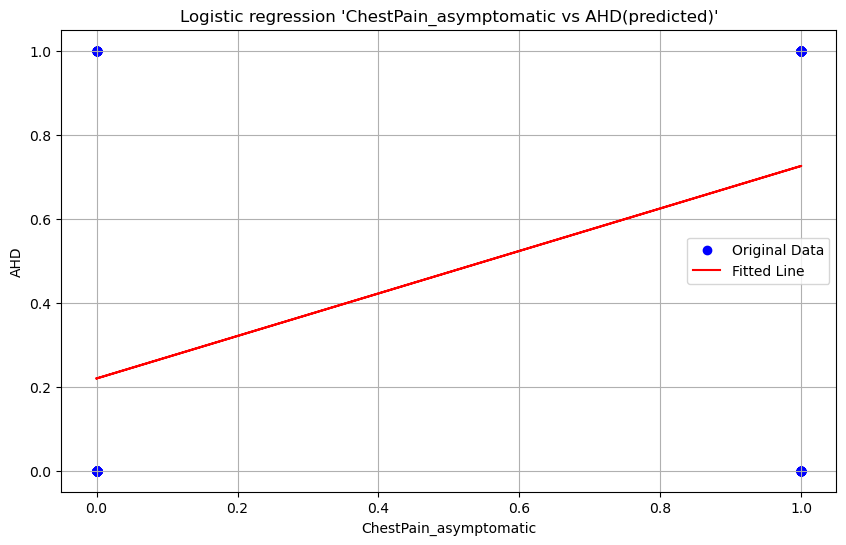

Confusion Matrix:
 [[121  34]
 [ 39 103]]


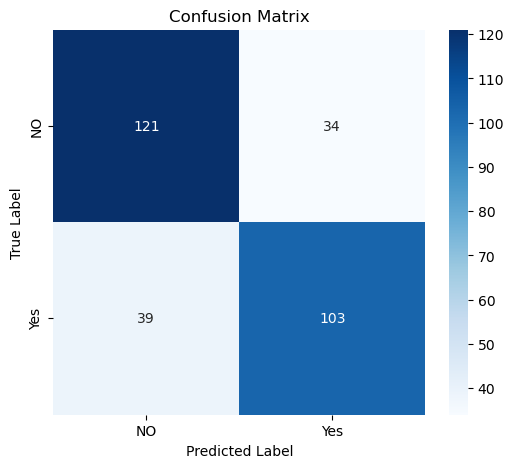

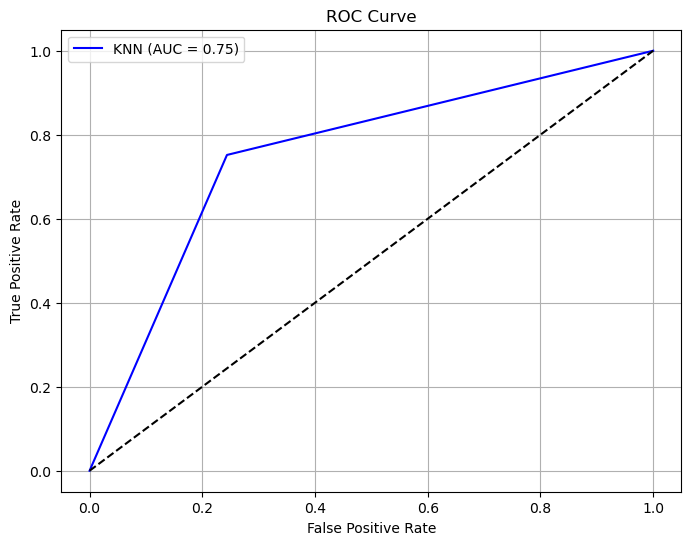

In [40]:
from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

y = heart['AHD']

x = heart['ChestPain_asymptomatic']
x_copy = x.copy()
#defining the sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

#define the negative log-likehood function
def log_likehood(beta, x, y):
    z = np.dot(x,beta)
    h = sigmoid(z)
    return -np.sum(y*np.log(h) + (1-y)*np.log(1-h))

#defining the hassian for standard error calculation
def hessian(beta, x):
    z = sigmoid(np.dot(x, beta))
    w = np.diag(z *(1-z))
    return -(np.dot(np.dot(x.T, w), x))    


x = np.column_stack((np.ones(len(x)), x))  # shape (297,2)

init_beta = np.zeros(x.shape[1]) # shape (2, 1)

#minimizing the negative log-likelihood function or maximizing the log-likehood function is same , there is inbuild function to minimize to i choose to minimize the negative log-likehood function
#minimizing the negative log-likelihood function

result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )
b0,b1 = result.x

print(f"The value of coefficient is :\n b0 = ",b0,"\n b1 = ", b1)

b = np.array([b0,b1])
k = np.dot(x,b)

y_app = sigmoid(k)
y_pre = sigmoid(k)


for i in range (len(y_app)):
    if y_app[i] > 0.5:
        y_app[i] = 1
    else:
        y_app[i] = 0
y_pre2 = y_app
print("log-likehood max value :",-log_likehood(b, x,y))

#calculating the accuracy of the model
accurcy = accuracy_score(y,y_app)
print("\nThe accuracy of the model is :",accurcy*100,"%")

#calculating the standard error
Hessian = hessian(b, x)
cov_matx = np.linalg.inv(-Hessian)
std_err = np.sqrt(np.diag(cov_matx))
SE_b0 , SE_b1 = std_err

print("The standard error of the model is : \n SE_b0 =",SE_b0, "\n SE_b1 =", SE_b1)

#Calculating Confident Interval 
CI_b0_l = b0 - 2*SE_b0
CI_b1_l = b1 - 2*SE_b1
CI_b0_u = b0 + 2*SE_b0
CI_b1_u = b1 + 2*SE_b1
print("\nThe confident Interval of b0 is: [", CI_b0_l,",",CI_b0_u,"]")
print("The confident Interval of b1 is: [", CI_b1_l,",",CI_b1_u,"]")

#Calculating z-statistic 
z_b0 = b0/SE_b0
z_b1 = b1/SE_b1
print("\nz-static of b0 :", z_b0)
print("z-static of b1", z_b1)

#Calculating the p-value
p_b0 = 2*norm.sf(abs(z_b0))
p_b1 = 2*norm.sf(abs(z_b1))
print("\np-value of b0 :", p_b0)
print("p-value of b1 :", p_b1)

#Hypothesis testing
#Null Hypothesis: b0 = 0 and b1 = 0
#Alternative Hypothesis: b0 != 0 or b1 != 0
print("\n Hypothesis test result:")
if p_b0<0.05:
    print("Reject the null hypothesis for b0")
else:
    print("Fail to reject the null hypothesis for b0")

if p_b1<0.05:
    print("Reject the null hypothesis for b1")
else:
    print("Fail to reject the null hypothesis for b1")
    
#plotting scatter(x,y) and plot(x,y_app)
plt.figure(figsize=(10,6))
plt.scatter(x_copy,y, color='blue', label='Original Data')
plt.plot(x_copy,y_pre, color='red', label='Fitted Line')
plt.xlabel("ChestPain_asymptomatic")
plt.ylabel("AHD")
plt.title("Logistic regression 'ChestPain_asymptomatic vs AHD(predicted)'")
plt.grid()
plt.legend()
plt.show()

confs_mtx= confusion_matrix(y_app, y)#confusion matrix
print("Confusion Matrix:\n", confs_mtx)

# Manually define  confusion matrix
cm = np.array(confs_mtx)

# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, thresholds = roc_curve(y, y_pre)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


### Simple Logistic Regression (***MaxHR vs AHD***)
* From the correlation matrix **MaxHR** has *-0.423817* second highest negative correlation  with AHD where prediction variable is quantitative.
* So, we apply Simple logistic Regression in predicted variable ***MaxHR*** and response variable ***AHD***.
* We define function for sigmoid in which if we pass value of linear regression value it give probability of that hence prediction.
* For prediction we need coefficient which is calculated from maximizing log_likelihood function as we define a function for it which return likelihood function respect to beta , predictor(x), response(y) that passed to it.
* Rather than maximizing the likelihood function we minimize the negative of likelihood function which give same result and for minimizing this function we are using *result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )* where method is Newton's method of higher dimension that return the minimizer of negative log_likelihood function hence value of coefficient.
* After getting the coefficient we use it for prediction.
* We define the hessian for standard error calculation.
* From the standard error we calculate Confident Interval , z-statics = b/SE_b , p-value and also there hypothesis test.

**Plotting of prediction region of the model:**
* We plot actual response variable (y = AHD)  and predictor variable (x= MaxHD)  in scatter form scatter(x,y) and plot predicted response varible (y_app) and predicted variable (x=MaxHD) in scatter form scatter(x,y_app).
* Which show that the region of prediction of model which is linear form in between 0 to 1.
* And show that logistic function always produce an S-shape curve.

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We use heatmap to plot the confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)

*What are the results* <br>
The results show that the probability of a patient having AHD is lower when the MaxHR compare to other predictor.This    
indicates that the presence of maxHR is a risk factor for AHD.


The results of the logistic regression model are as follows:

| Feature | Coefficient | Accuracy | p-value |
| --- | --- | --- | --- |   
| Max_HR| 6.47, -0.0444 | 71.043% | 1.07e-10, 2.27e-11 |



The value of coefficient is :
 b0 =  6.472207293838899 
 b1 =  -0.04431255424700309
log-likehood max value : -175.9851761148717

The accuracy of the model is : 71.04377104377105 %
The standard error of the model is : 
 SE_b0 = 1.0025785175128878 
 SE_b1 = 0.00662664001994713

The confident Interval of b0 is: [ 4.467050258813123 , 8.477364328864674 ]
The confident Interval of b1 is: [ -0.05756583428689735 , -0.031059274207108828 ]

z-static of b0 : 6.455561515415875
z-static of b1 -6.687032057515722

p-value of b0 : 1.0781837246318786e-10
p-value of b1 : 2.277420049656008e-11

 Hypothesis test result:
Reject the null hypothesis for b0
Reject the null hypothesis for b1


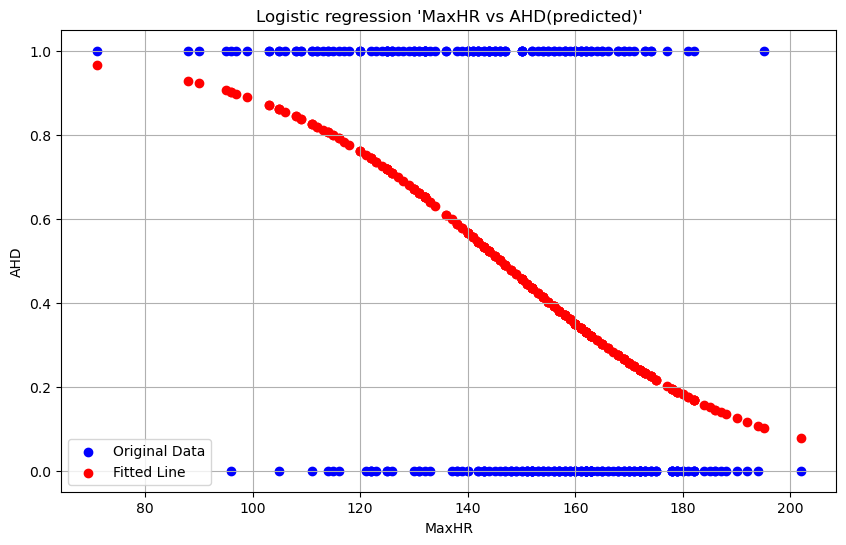

Confusion Matrix:
 [[126  52]
 [ 34  85]]


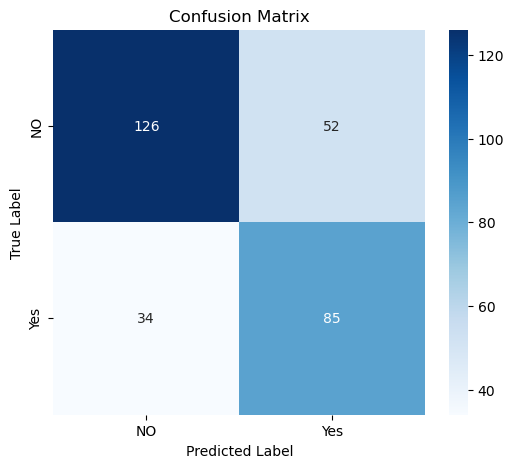

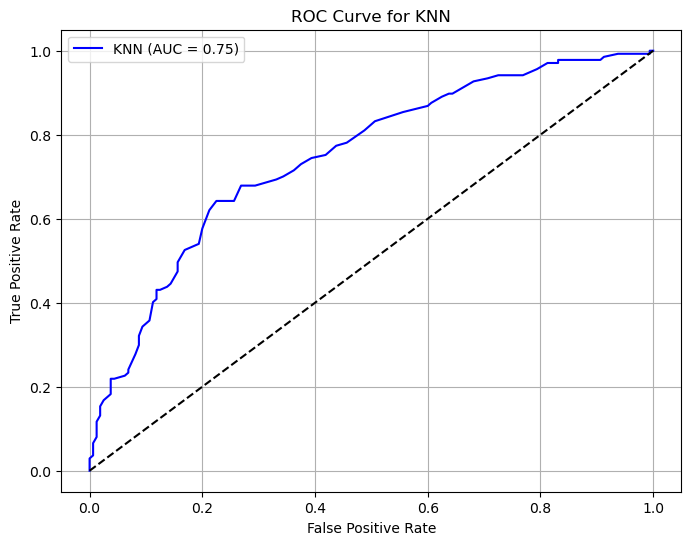

In [41]:
from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

y = heart['AHD']

x = heart['MaxHR']
x_copy = x.copy()
#defining the sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

#define the negative log-likehood function
def log_likehood(beta, x, y):
    z = np.dot(x,beta)
    h = sigmoid(z)
    return -np.sum(y*np.log(h) + (1-y)*np.log(1-h))

#defining the hassian for standard error calculation
def hessian(beta, x):
    z = sigmoid(np.dot(x, beta))
    w = np.diag(z *(1-z))
    return -(np.dot(np.dot(x.T, w), x))    


x = np.column_stack((np.ones(len(x)), x))  # shape (297,2)

init_beta = np.zeros(x.shape[1]) # shape (2, 1)

#minimizing the negative log-likelihood function or maximizing the log-likehood function is same , there is inbuild function to minimize to i choose to minimize the negative log-likehood function
#minimizing the negative log-likelihood function

result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )
b0,b1 = result.x

print(f"The value of coefficient is :\n b0 = ",b0,"\n b1 = ", b1)

b = np.array([b0,b1])
k = np.dot(x,b)

y_app = sigmoid(k)
y_pre = sigmoid(k)

for i in range (len(y_app)):
    if y_app[i] > 0.5:
        y_app[i] = 1
    else:
        y_app[i] = 0
        
print("log-likehood max value :",-log_likehood(b, x,y))

#calculating the accuracy of the model
accurcy = accuracy_score(y,y_app)
print("\nThe accuracy of the model is :",accurcy*100,"%")

#calculating the standard error
Hessian = hessian(b, x)
cov_matx = np.linalg.inv(-Hessian)
std_err = np.sqrt(np.diag(cov_matx))
SE_b0 , SE_b1 = std_err

print("The standard error of the model is : \n SE_b0 =",SE_b0, "\n SE_b1 =", SE_b1)

#Calculating Confident Interval 
CI_b0_l = b0 - 2*SE_b0
CI_b1_l = b1 - 2*SE_b1
CI_b0_u = b0 + 2*SE_b0
CI_b1_u = b1 + 2*SE_b1
print("\nThe confident Interval of b0 is: [", CI_b0_l,",",CI_b0_u,"]")
print("The confident Interval of b1 is: [", CI_b1_l,",",CI_b1_u,"]")

#Calculating z-statistic 
z_b0 = b0/SE_b0
z_b1 = b1/SE_b1
print("\nz-static of b0 :", z_b0)
print("z-static of b1", z_b1)

#Calculating the p-value
p_b0 = 2*norm.sf(abs(z_b0))
p_b1 = 2*norm.sf(abs(z_b1))
print("\np-value of b0 :", p_b0)
print("p-value of b1 :", p_b1)

#Hypothesis testing
#Null Hypothesis: b0 = 0 and b1 = 0
#Alternative Hypothesis: b0 != 0 or b1 != 0
print("\n Hypothesis test result:")
if p_b0<0.05:
    print("Reject the null hypothesis for b0")
else:
    print("Fail to reject the null hypothesis for b0")

if p_b1<0.05:
    print("Reject the null hypothesis for b1")
else:
    print("Fail to reject the null hypothesis for b1")
    
#plotting scatter(x,y) and plot(x,y_app)
plt.figure(figsize=(10,6))
plt.scatter(x_copy,y, color='blue', label='Original Data')
plt.scatter(x_copy,y_pre, color='red', label='Fitted Line')
plt.xlabel("MaxHR")
plt.ylabel("AHD")
plt.title("Logistic regression 'MaxHR vs AHD(predicted)'")
plt.grid()
plt.legend()
plt.show()


confs_mtx= metrics.confusion_matrix(y_app, y)#confusion matrix
print("Confusion Matrix:\n", confs_mtx)

# Manually define  confusion matrix
cm = np.array(confs_mtx)

# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_pre)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

# Multiple Logistic Regression

In multiple logistic regression:

**x = [Thal_normal, ChestPain_asymptomatic]  <br>
y = [AHD]**

* From the correlation matrix taking two predictor x1 = Thal_normal and x2 = ChestPain_asymptomatic which is highly correlated with response y = AHD.
* We are using the logistic function to model the probability of AHD given the predictor variables.
* Same as Simple logistic regression just x will be matrix of [ones(len(x)), x1, x1] and initial beta shape of 3 for b0, b1, b2.
* We define function for sigmoid in which if we pass value of linear regression value it give probability of that hence prediction.
* For prediction we need coefficient which is calculated from maximizing log_likelihood function as we define a function for it which return likelihood function respect to beta , predictor(x), response(y) that passed to it.
* Rather than maximizing the likelihood function we minimize the negative of likelihood function which give same result and for minimizing this function we are using *result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )* where method is Newton's method of higher dimension that return the minimizer of negative log_likelihood function hence value of coefficient.
* After getting the coefficient we use it for prediction.
* We define the hessian for standard error calculation.
* From the standard error we calculate Confident Interval , z-statics(z_b) = b/SE_b , p-value = 2*norm.sf(abs(z_b)) and also there hypothesis test.


**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We use heatmap to plot the confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)

*What are the results* <br>
* The results show that the probability of a patient having AHD effected by Thal_normal and ChestPain_asymptomatic compare to other predictor.This    
indicates that the presence of Thal_normal and ChestPain_asymptomatic is a risk factor for AHD.


The results of the logistic regression model are as follows:

| Feature | Coefficient | Accuracy | p-value |
| --- | --- | --- | --- |   
| Thal_normal and ChestPain_asymptomatic| -0.0095, -2.09, 1.97 | 77.1043% | 0.97, 4.14e-12, 4.72e-11 |

* `p-value of  b0 : 0.009511 and z-static of b0 : -0.03642 which means in hypothesis test b0 "Fail to reject the null hypothesis for b0" hence b0 =0.`


   

The value of coefficient is :
 b0 =  -0.009511526556730196 
 b1 =  -2.090963478333005 
 b2 = 1.9792230442614438
log-likehood max value : -138.46292504170873

The accuracy of the model is : 77.10437710437711 %
The standard error of the model is : 
 SE_b0 = 0.26115843802169497 
 SE_b1 = 0.30163755303184414 
 SE_b2 = 0.3008174522466354

The confident Interval of b0 is: [ -0.5318284026001201 , 0.5128053494866598 ]
The confident Interval of b1 is: [ -2.694238584396693 , -1.4876883722693168 ]
The confident Interval of b2 is: [ 1.3775881397681728 , 2.5808579487547147 ]

z-static of b0 : -0.03642052169089805
z-static of b1 -6.932039652610032
z-static of b2 6.57948210610703

p-value of b0 : 0.9709470510903788
p-value of b1 : 4.148156388518576e-12
p-value of b2 : 4.720897172266511e-11

 Hypothesis test result:
Fail to reject the null hypothesis for b0
Reject the null hypothesis for b1
Reject the null hypothesis for b1

Confusion Matrix:
 [[150  58]
 [ 10  79]]


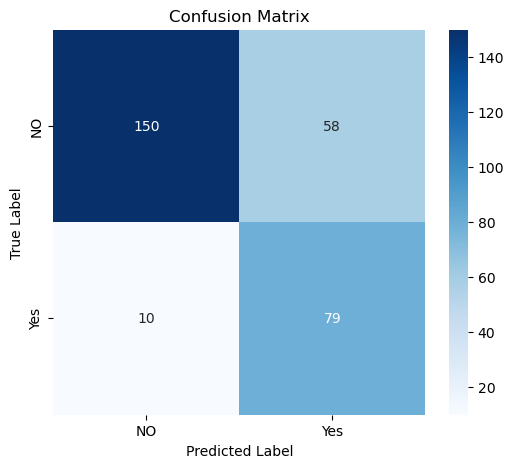

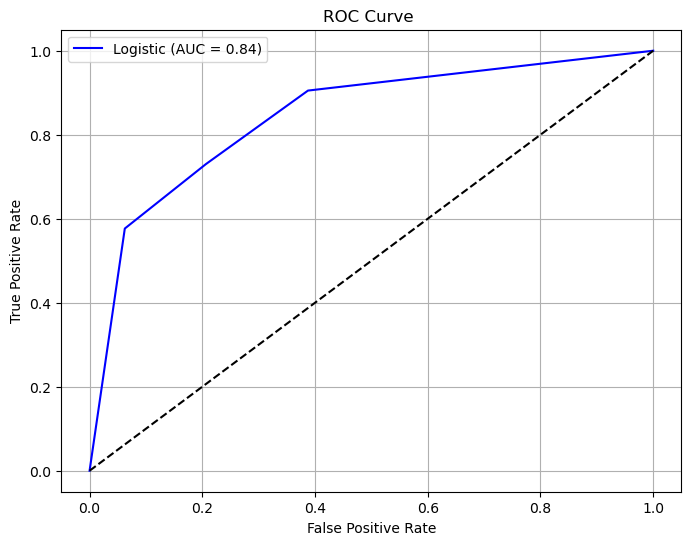

In [46]:
from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

y = heart['AHD']

x1 = heart['Thal_normal']
x2 = heart['ChestPain_asymptomatic']
x1_copy = x1.copy()
x2_copy = x2.copy()
#defining the sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

#define the negative log-likehood function
def log_likehood(beta, x, y):
    z = np.dot(x,beta)
    h = sigmoid(z)
    return -np.sum(y*np.log(h) + (1-y)*np.log(1-h))

#defining the hassian for standard error calculation
def hessian(beta, x):
    z = sigmoid(np.dot(x, beta))
    w = np.diag(z *(1-z))
    return -(np.dot(np.dot(x.T, w), x))    


x = np.column_stack((np.ones(len(x)), x1, x2))  

init_beta = np.zeros(x.shape[1]) 

#minimizing the negative log-likelihood function or maximizing the log-likehood function is same , there is inbuild function to minimize to i choose to minimize the negative log-likehood function
#minimizing the negative log-likelihood function

result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )
b0,b1, b2 = result.x

print(f"The value of coefficient is :\n b0 = ",b0,"\n b1 = ", b1,"\n b2 =", b2)

b = np.array([b0,b1, b2])
k = np.dot(x,b)

y_app = sigmoid(k)
y_pre = sigmoid(k)


for i in range (len(y_app)):
    if y_app[i] > 0.5:
        y_app[i] = 1
    else:
        y_app[i] = 0
y_pre3 = y_app
y_prob3 = y_pre       
print("log-likehood max value :",-log_likehood(b, x,y))

#calculating the accuracy of the model
accurcy = accuracy_score(y,y_app)
print("\nThe accuracy of the model is :",accurcy*100,"%")

#calculating the standard error
Hessian = hessian(b, x)
cov_matx = np.linalg.inv(-Hessian)
std_err = np.sqrt(np.diag(cov_matx))
SE_b0 , SE_b1 , SE_b2= std_err

print("The standard error of the model is : \n SE_b0 =",SE_b0, "\n SE_b1 =", SE_b1,"\n SE_b2 =", SE_b2)

#Calculating Confident Interval 
CI_b0_l = b0 - 2*SE_b0
CI_b1_l = b1 - 2*SE_b1
CI_b0_u = b0 + 2*SE_b0
CI_b1_u = b1 + 2*SE_b1
CI_b2_l = b2 - 2*SE_b2
CI_b2_u = b2 + 2*SE_b2

print("\nThe confident Interval of b0 is: [", CI_b0_l,",",CI_b0_u,"]")
print("The confident Interval of b1 is: [", CI_b1_l,",",CI_b1_u,"]")
print("The confident Interval of b2 is: [", CI_b2_l,",",CI_b2_u,"]")

#Calculating z-statistic 
z_b0 = b0/SE_b0
z_b1 = b1/SE_b1
z_b2 = b2/SE_b2
print("\nz-static of b0 :", z_b0)
print("z-static of b1", z_b1)
print("z-static of b2", z_b2)


#Calculating the p-value
p_b0 = 2*norm.sf(abs(z_b0))
p_b1 = 2*norm.sf(abs(z_b1))
p_b2 = 2*norm.sf(abs(z_b2))
print("\np-value of b0 :", p_b0)
print("p-value of b1 :", p_b1)
print("p-value of b2 :", p_b2)


#Hypothesis testing
#Null Hypothesis: b0 = 0 and b1 = 0 and b2 = 0
#Alternative Hypothesis: b0 != 0 or b1 != 0 or b2 !=0

print("\n Hypothesis test result:")
if p_b0<0.05:
    print("Reject the null hypothesis for b0")
else:
    print("Fail to reject the null hypothesis for b0")

if p_b1<0.05:
    print("Reject the null hypothesis for b1")
else:
    print("Fail to reject the null hypothesis for b1")
    
if p_b2<0.05:
    print("Reject the null hypothesis for b1")
else:
    print("Fail to reject the null hypothesis for b2\n\n")
    
#plotting scatter(x,y) and plot(x,y_app)
confs_mtx= metrics.confusion_matrix(y_app, y)#confusion matrix
print("\nConfusion Matrix:\n", confs_mtx)

# Manually define  confusion matrix
cm = np.array(confs_mtx)

# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, thresholds = roc_curve(y, y_pre)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve ')
plt.legend()
plt.grid(True)
plt.show()

#### Multiple Logistic regression (***All predictor vs AHD***) <br>
x =  all variable of heart.csv<br>
y =  AHD.
1. Same as multiple linear regression we  make a matrix having [ones(len(x)), all predictors].
2. Taking initial beta as zero matrix and maximizing Likehood-function we get beta corresponding to all predictors.
3. Taking the value of beta we can predict the response variable.

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We use heatmap to plot the confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)

*What are the results* <br>
* The results show that the probability of a patient having AHD effected by all predictor.This    
indicates that the presence of  is a risk factor for AHD.


The results of the logistic regression model are as follows:

| Feature | Coefficient | Accuracy | p-value |
| --- | --- | --- | --- |   
| All Predictor| See Output | 86.19% | See Output |

Intercept (b0): -2.956813
Slope (b1) : -0.012296
Slope (b2) : 1.431414
Slope (b3) : -1.559217
Slope (b4) : -0.488060
Slope (b5) : -1.357042
Slope (b6) : 0.447582
Slope (b7) : 0.023981
Slope (b8) : 0.004930
Slope (b9) : -0.610753
Slope (b10) : 0.255435
Slope (b11) : -0.021281
Slope (b12) : 0.739427
Slope (b13) : 0.353096
Slope (b14) : 0.670504
Slope (b15) : 1.269291
Slope (b16) : -1.458438
Slope (b17) : -1.469863
Slope (b18) : -0.028483
log-likehood max value : -97.41625079065602

The accuracy of the model is : 86.19528619528619 %
Standard Error of b(0) : nan
Standard Error of b(1) : 0.024664
Standard Error of b(2) : 0.513185
Standard Error of b(3) : 6829886.590361
Standard Error of b(4) : 6491198.017497
Standard Error of b(5) : 9070509.825883
Standard Error of b(6) : 9154620.992768
Standard Error of b(7) : 0.011110
Standard Error of b(8) : 0.003944
Standard Error of b(9) : 0.599184
Standard Error of b(10) : 0.189565
Standard Error of b(11) : 0.010821
Standard Error of b(12) : 0.434687


C:\Users\user\AppData\Local\Temp\ipykernel_7288\304018111.py:69: RuntimeWarning: invalid value encountered in sqrt
  std_err = np.sqrt(np.diag(cov_matx))


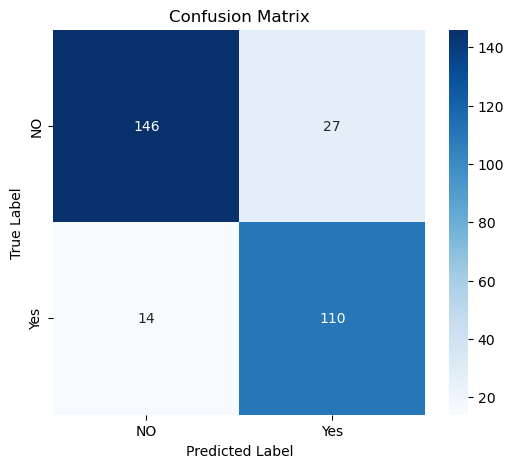

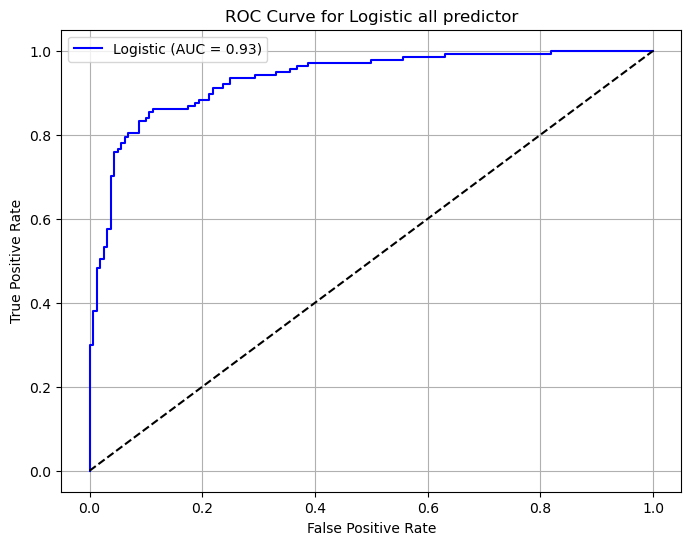

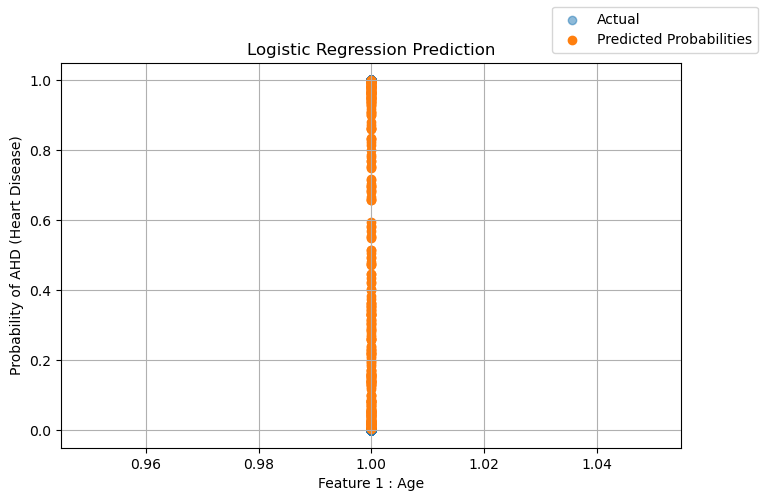

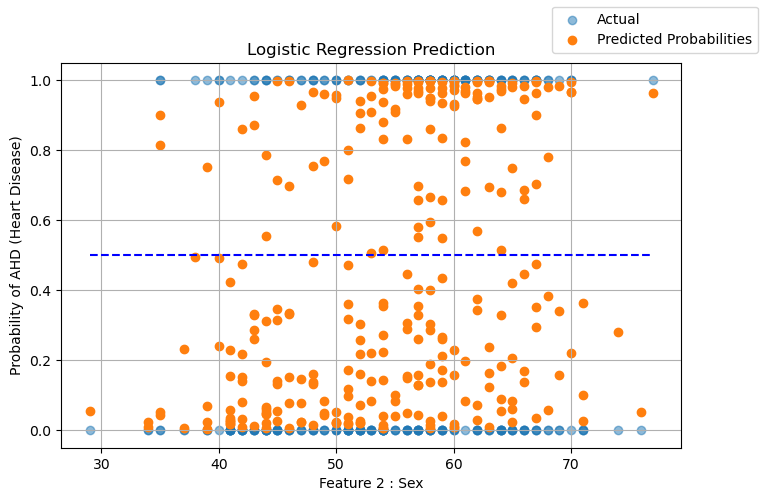

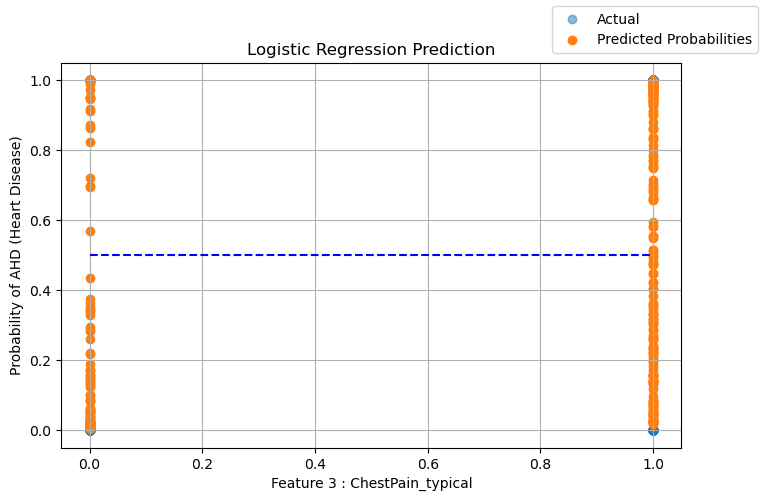

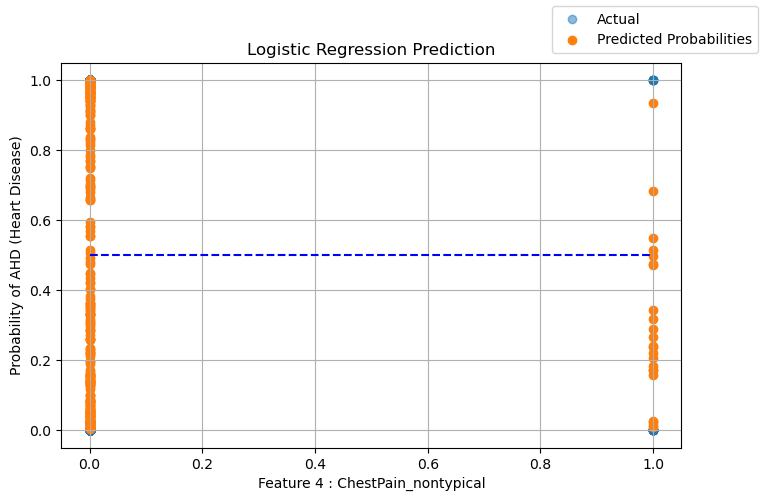

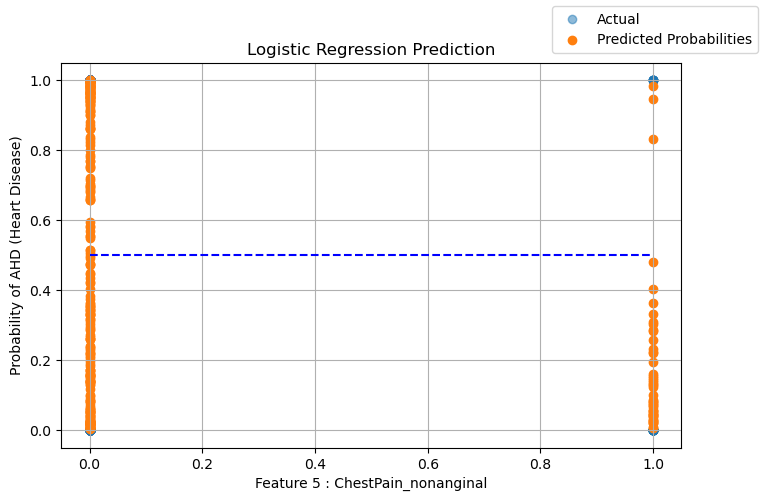

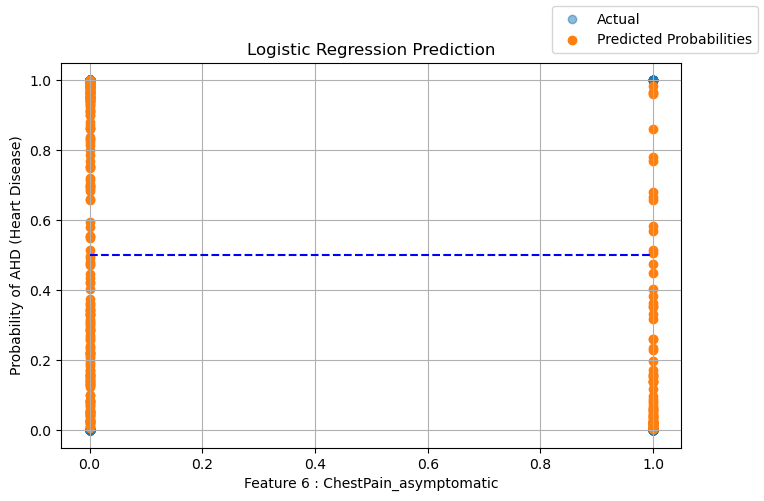

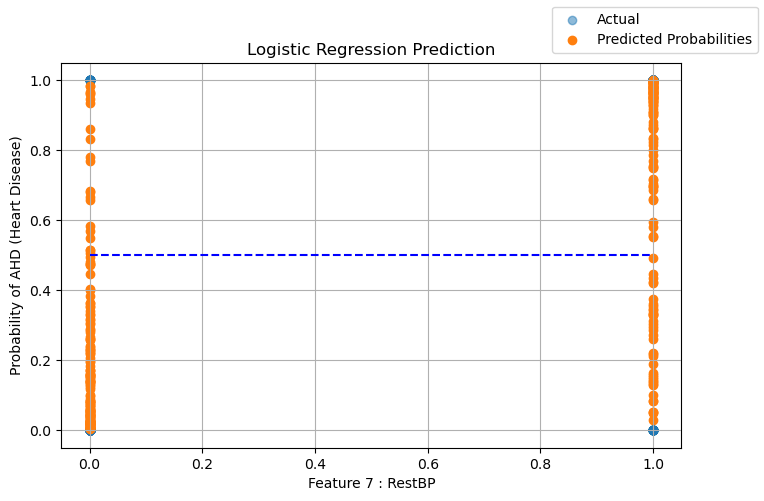

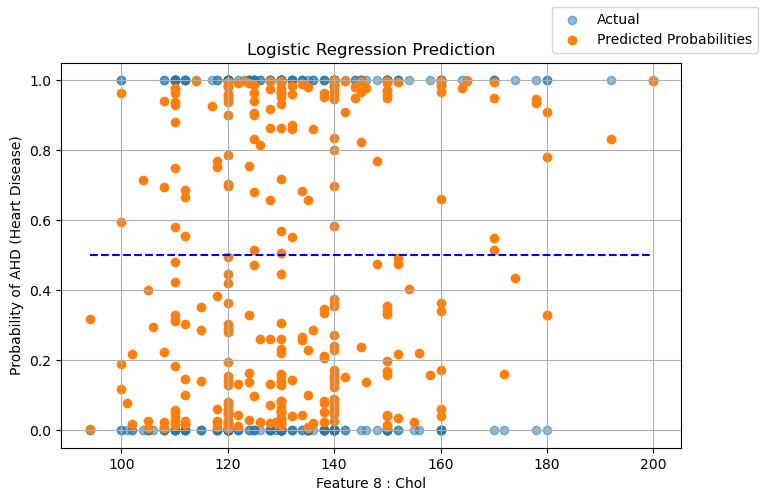

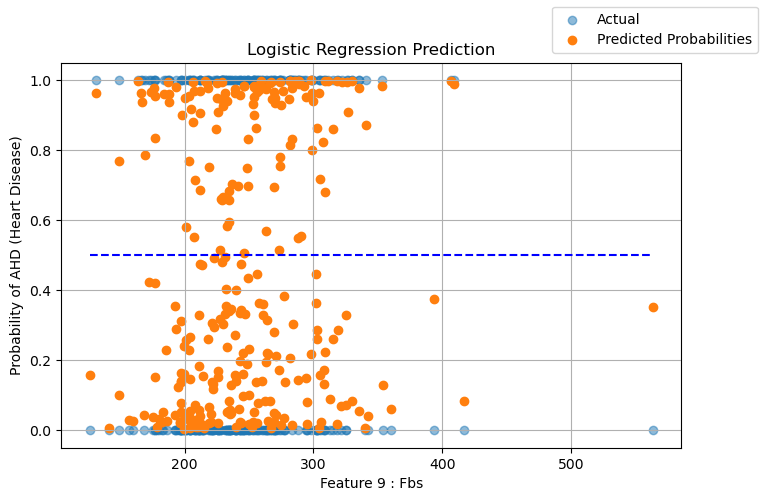

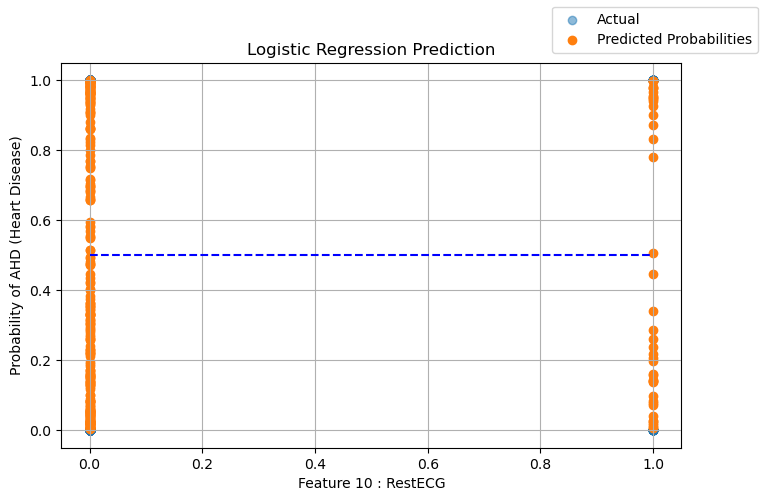

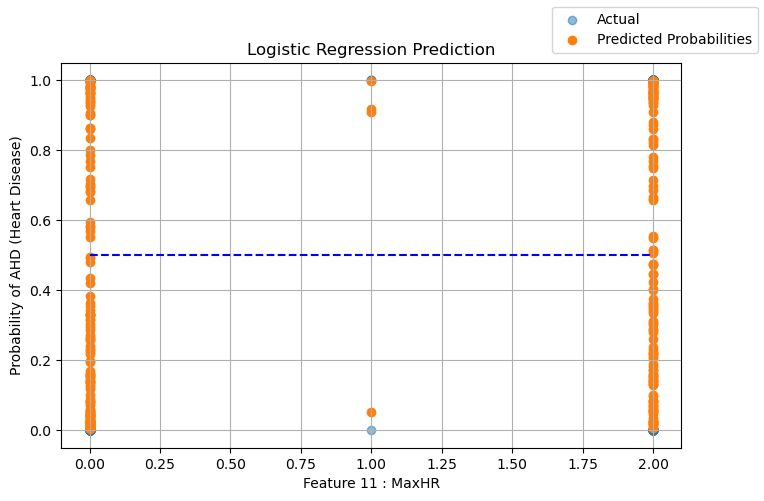

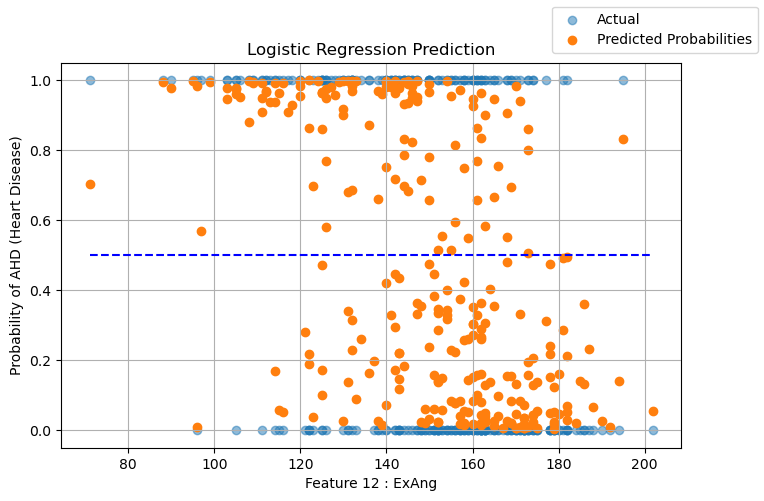

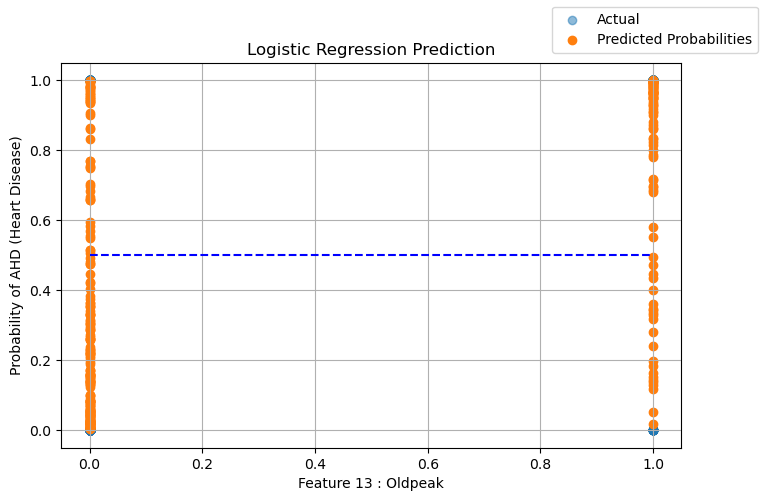

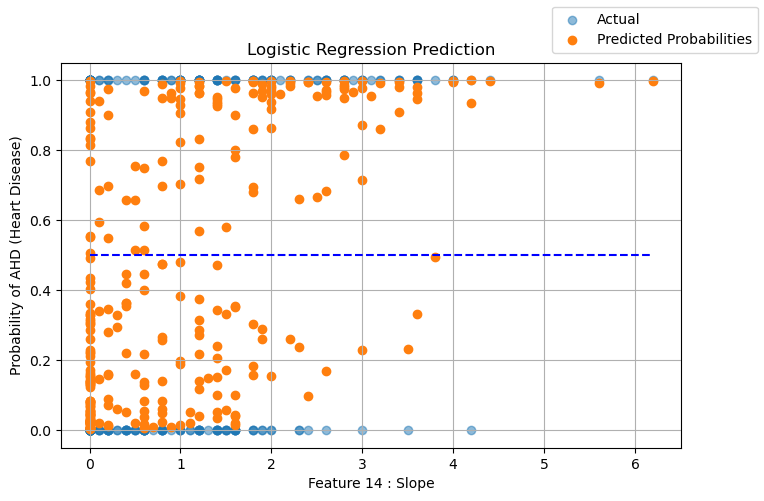

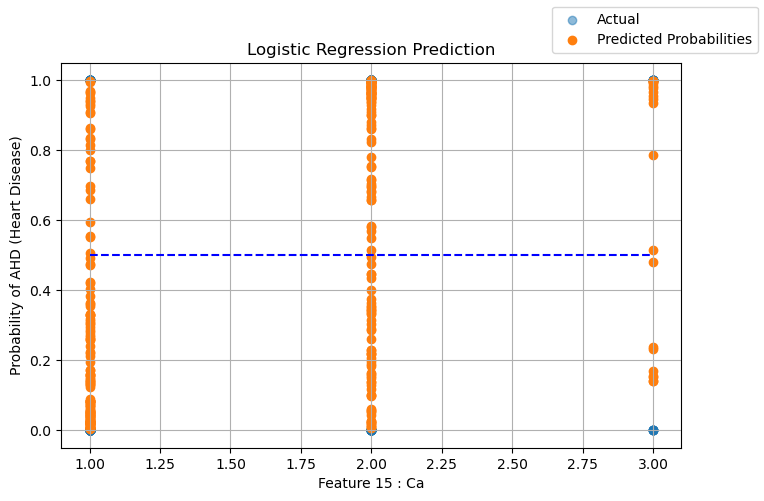

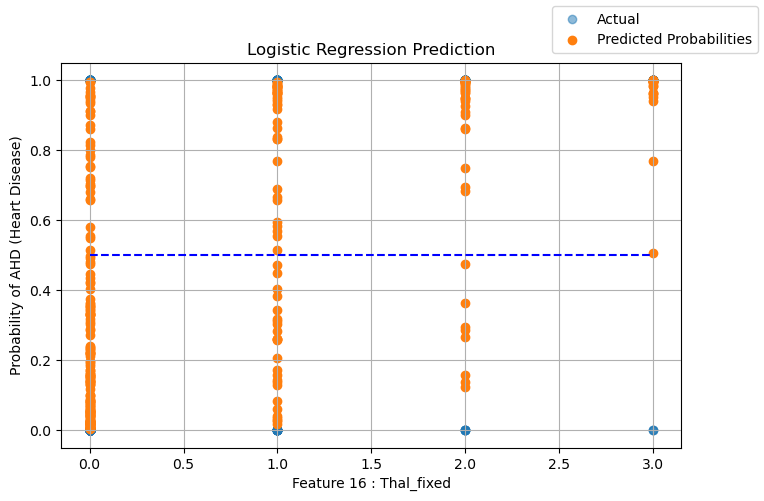

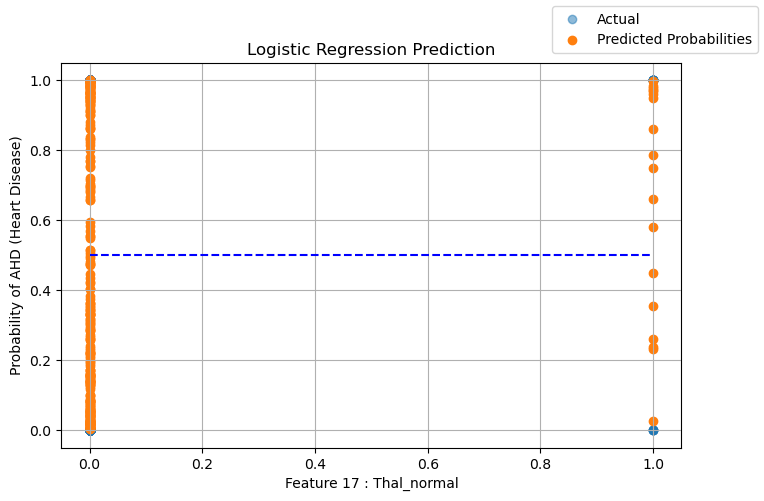

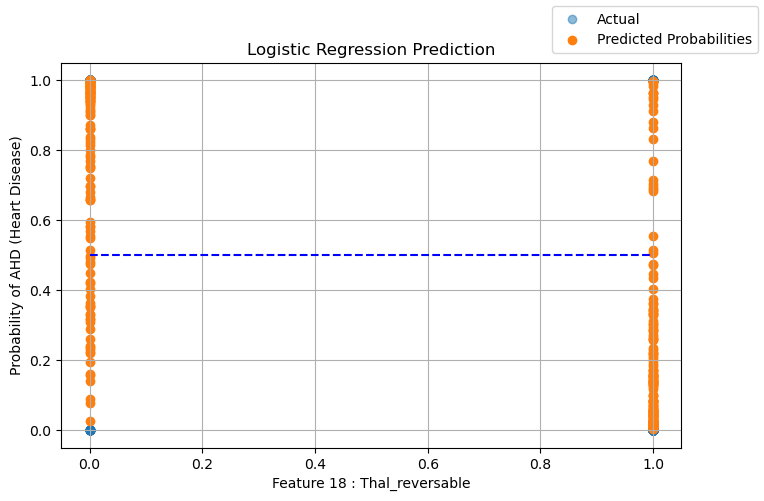

In [72]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

y = heart['AHD']

x = heart[['Age', 'Sex' , 'ChestPain_typical', 'ChestPain_nontypical', 'ChestPain_nonanginal', 'ChestPain_asymptomatic','RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca',  'Thal_fixed', 'Thal_normal', 'Thal_reversable']]

x1_copy = x.copy()
#defining the sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

#define the negative log-likehood function
def log_likehood(beta, x, y):
    z = np.dot(x,beta)
    h = sigmoid(z)
    return -np.sum(y*np.log(h) + (1-y)*np.log(1-h))

#defining the hassian for standard error calculation
def hessian(beta, x):
    z = sigmoid(np.dot(x, beta))
    w = np.diag(z *(1-z))
    return -(np.dot(np.dot(x.T, w), x))    


x = np.column_stack((np.ones(len(x)), x))  

init_beta = np.zeros(x.shape[1]) 

#minimizing the negative log-likelihood function or maximizing the log-likehood function is same , there is inbuild function to minimize to i choose to minimize the negative log-likehood function
#minimizing the negative log-likelihood function

result = minimize(log_likehood, init_beta, args=(x,y), method = 'BFGS' )
b = result.x


# Coefficients
print(f"Intercept (b0): {b[0]:.6f}")
for i in range(1,len(b)):
    print(f"Slope (b{i}) : {b[i]:.6f}")

k = np.dot(x,b)

y_app = sigmoid(k)
y_pre = sigmoid(k)


for i in range (len(y_app)):
    if y_app[i] > 0.5:
        y_app[i] = 1
    else:
        y_app[i] = 0
y_pre4 = y_app
y_prob4 = y_pre     
print("log-likehood max value :",-log_likehood(b, x,y))

#calculating the accuracy of the model
accurcy = accuracy_score(y,y_app)
print("\nThe accuracy of the model is :",accurcy*100,"%")

#calculating the standard error
Hessian = hessian(b, x)
cov_matx = np.linalg.inv(-Hessian)
std_err = np.sqrt(np.diag(cov_matx))
SE_b= std_err


for i in range(len(SE_b)):
    print(f"Standard Error of b({i}) : {SE_b[i]:.6f}")


#Calculating Confident Interval 
for i in range(len(b)):
    ci_l= b[i]-2*SE_b[i]
    ci_u=b[i]+2*SE_b[i]
    print(f"95% Confidence Interval for b{i}: [{ci_l:.6f}, {ci_u:.6f}]")


#Calculating z-statistic 
for i in range(len(b)):
    print(f"z-value for b({i}) : {b[i] / SE_b[i]:.4f}")

#Calculating the p-value
for i in range(len(b)):
    p_value=2*norm.sf(abs(b[i]/SE_b[i]))
    print(f"p-value for b({i}):{p_value:.6f}")

# Hypothesis testing
print("\nHypothesis Testing Results:")
for i in range(len(b)):
    p_value=2*norm.sf(abs(b[i]/SE_b[i]))
    if p_value<0.05 :
        print(f"Reject Null Hypothesis for b({i}) (b({i}) != 0)")
    else:
        print(f"Fail to Reject Null Hypothesis for b({i}) (b{i} = 0)")



confs_mtx= metrics.confusion_matrix(y_app, y)#confusion matrix
# Manually define  confusion matrix
cm = np.array(confs_mtx)

# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_pre)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic all predictor')
plt.legend()
plt.grid(True)
plt.show()


# Visualize prediction probabilities vs. All Features
x_1 = heart.drop('AHD',axis=1)
for i in range((18)):
    fig ,ax=subplots(figsize=(8, 5))
    ax.scatter(x[:,i], y, label='Actual', alpha=0.5)
    ax.scatter(x[:,i], y_pre, label='Predicted Probabilities')
    ax.hlines(0.5, min(x[:,i]), max(x[:,i]), colors='blue', linestyles='--')
    ax.set_xlabel(f'Feature {i+1} : {x_1.columns[i]}')
    ax.set_ylabel('Probability of AHD (Heart Disease)')
    ax.set_title('Logistic Regression Prediction')
    fig.legend()
    ax.grid(True)
    fig


## K-Nearest Neighbors
1. **What is K-Nearest Neighbors (KNN)?**
    * KNN is a simple and intuitive **supervised and non-parametric** used for both **classification** and **regression** tasks.

2. **What is the main idea behind KNN?**
    * The main idea of KNN is to find the 'K' closest points to a test point (using a distance metric like Euclidean distance) and assign the most frequent class among them (majority voting) as the prediction.

3. **How does KNN work?**
    * Choose the number of neighbors `K`.
    * Calculate the distance between the new data point and all other data points in the training set.
    * Sort the distances and pick the **K nearest neighbors**.
    * Perform **majority voting** for classification (or average for regression).
    * Return the predicted class (or value).

4. **What is the purpose of the distance function in KNN?**
    * The distance function (commonly **Euclidean distance**) is used to measure how far each data point is from the test point.
    * This helps identify the K nearest training points (neighbors).

5. **How is it used in this case?**
    * In this case, KNN is used to predict whether a patient has heart disease (AHD) or not.
    * We take a test point (e.g., `x0 = 0`), compute its distance from all training data points (like Thal_normal values), and find the **K nearest neighbors**.
    * Then we check the AHD values of these neighbors and apply *majority voting* to decide if the prediction is 0 (No Heart Disease) or 1 (Yes).
    * For example:
        * `K-Nearest Point X-values`: [0, 1, 0, ..., 1]
        * `K-Nearest Point Y-values`: [0, 1, 0, ..., 1]
        * If the majority of `Y` values are `1`, prediction is `AHD: True`.
    * This method does not require training a model — it stores the whole dataset and uses it during prediction (called **lazy learning**).



### Simple K-Nearest Neighbors (***Thal_normal vs AHD***)

* From the correlation matrix, **Thal_normal** has a strong negative correlation with AHD (*-0.524972*), so we apply **K-Nearest Neighbors (KNN)** using ***Thal_normal*** as the predictor and ***AHD*** as the response variable.

* We define a test point `x0` (e.g., `x0 = 0`) and then compute the **Euclidean distance** between this test point and every value in the predictor variable `x = Thal_normal`.

* To avoid comparing a point with itself that give wrong nearest distance, we use:<br>
  `x_temp = np.delete(x, i, axis=0)` <br>
This removes the current test point (xi) from the data, so that it doesn't count itself as a neighbor.
* Then we calculate distances using:<br>
`d = np.linalg.norm(x_temp - x0, axis=1)`
* After calculating all distances, we use: <br>
`nearest_neighbors = np.argsort(d)[:k]` <br>
to get indices of the k smallest distances — that is, the k nearest neighbors.
* From these indices, we collect the corresponding y values (AHD values) and apply majority voting to decide the final prediction:<br>
`majority_vote = Counter(y_temp[nearest_neighbors]).most_common(1)[0][0]` and 
`y_predc.append(majority_vote)`<br>
* After each iteration we append xi so that for other iteration i will count for nearest distance.
* Using for loop this process is repeated each sample to generate the predicted array y_predict.

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We compare the predicted array y_predict with the actual response variable y using a confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)

*What are the results* <br>
The KNN model using Thal_normal gives a simple yet 58.92% accuracy to classify AHD.
The results of the KNN model are as follows:

| Feature  |K-value| Accuracy | 
| --- | --- | --- |  
| Thal_noram| 25 | 58.92% |

The accuracy of the K-Nearest Neighbor model is: 58.92%


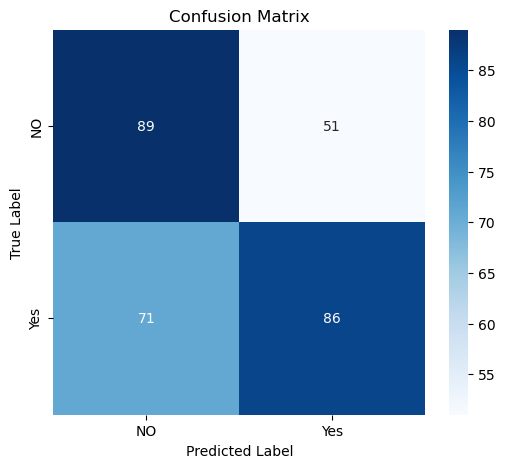

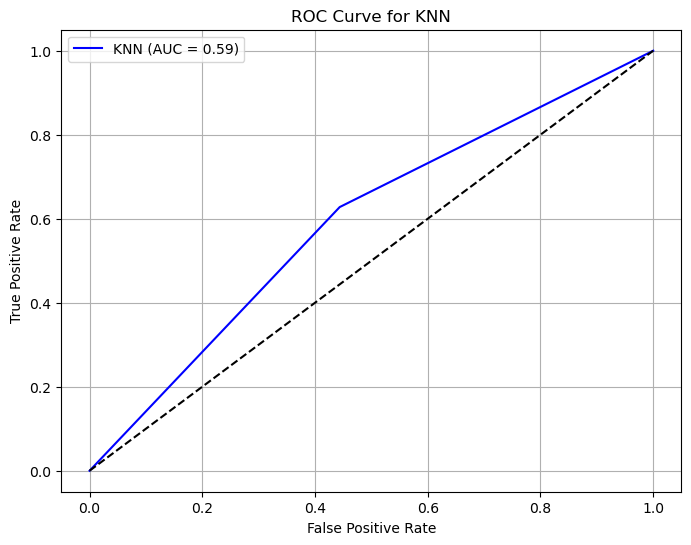

In [60]:
from collections import Counter
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix

y = heart['AHD'].values

x = heart['Thal_normal'].values
x_copy = x.copy()# copy the values to avoid modifying the original data
y_predc = []

for i in range(len(x)):
    x0 = x[i]
    x = np.delete(x,i)
    
    k = 25
    #calculate the distance between the test point and each data point
    d = np.sqrt((x0-x)**2)
    
    # calculate the K nearest neighbors
    nearest_neighbors = np.argsort(d)[:k]   
    
    #print("K-Nearest Point X-values :\n",x_copy[nearest_neighbors])
    #print("Corresponding K-Nearest Point Y-values :\n",y[nearest_neighbors])
    majority_vote = Counter(y[nearest_neighbors]).most_common(1)[0][0]
    #print('Predicted Label:', majority_vote)
    y_predc.append(majority_vote)
    x = np.append(x, x0)

accur = accuracy_score(y,y_predc)
print(f"The accuracy of the K-Nearest Neighbor model is: {accur*100:.2f}%")
y_pre5 = y_predc
#Confusion Matrix and its plot
confs_mtx= metrics.confusion_matrix(y_predc, y)#confusion matrix

# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confs_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_predc)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()



### Simple K-Nearest Neighbors (***ChestPain_asymptomatic vs AHD***)

* From the correlation matrix, **ChestPain_asymptomatic** has a strong positive correlation with AHD (*0.507035*), so we apply **K-Nearest Neighbors (KNN)** using ***ChestPain_asymptomaticl*** as the predictor and ***AHD*** as the response variable.

* Doing same as above for Thal_normal vs AHD

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We compare the predicted array y_predict with the actual response variable y using a confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)


*What are the results* <br>
The KNN model using ChestPain_asymptomatic gives a simple yet 59.26% accuracy to classify AHD.
The results of the KNN model are as follows:

| Feature  |K-value| Accuracy | 
| --- | --- | --- |  
| ChestPain_asymptomatic| 16 | 59.26% |


Accuracy: 59.26%


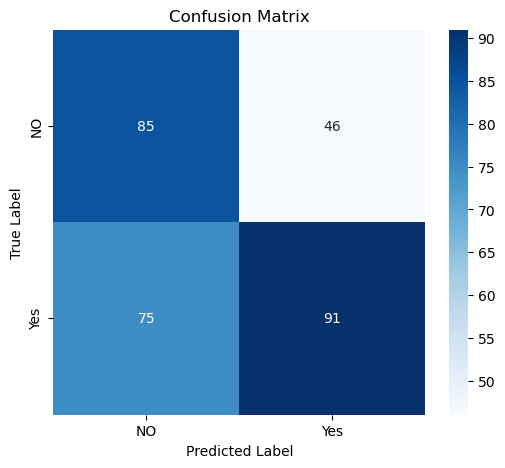

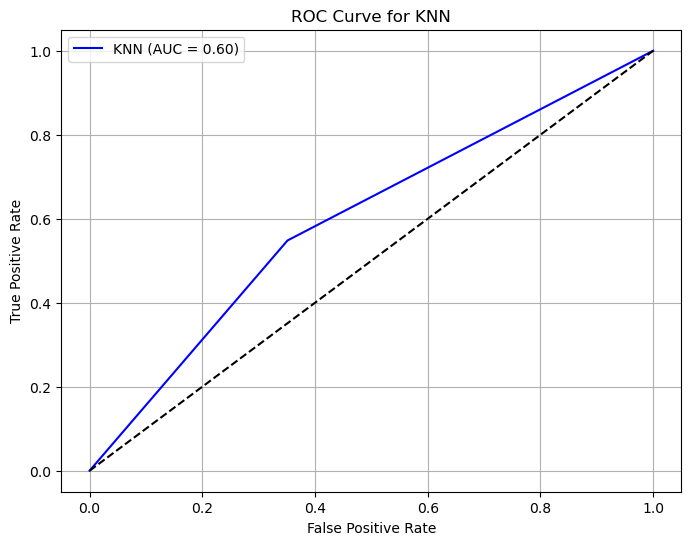

In [25]:

from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score

y = heart['AHD'].values
x = heart[['ChestPain_asymptomatic']].values

y_predict = []
k = 16
for i in range(len(x)):
    x0 = x[i]
    x = np.delete(x,i)
    
    
    #calculate the distance between the test point and each data point
    d = np.sqrt((x0-x)**2)
    
    # calculate the K nearest neighbors
    nearest_neighbors = np.argsort(d)[:k]   
    
    #print("K-Nearest Point X-values :\n",x_copy[nearest_neighbors])
    #print("Corresponding K-Nearest Point Y-values :\n",y[nearest_neighbors])
    majority_vote = Counter(y[nearest_neighbors]).most_common(1)[0][0]
    #print('Predicted Label:', majority_vote)
    
    x = np.append(x, x0)
    y_predict.append(majority_vote)

# Accuracy
accr = accuracy_score(y, y_predict)
print(f"Accuracy: {accr*100:.2f}%")

#Confusion matrix 
confs_mtx = confusion_matrix(y_predict, y)
y_pre6 = y_predict

#ploting of confusion matrix
# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confs_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y_predict, y)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

### Multiple K-Nearest Neighbor (***Thal_normal and ChestPain_asymptomatic vs AHD***)
(*x = heart['Thal_normal', 'ChestPain_asymptomatic']*) <br>
(*y = heart['AHD']*)

 
* From the correlation matrix,**Thal_normal** has a strong negative correlation with AHD (*-0.524972*) and **ChestPain_asymptomatic** has a strong positive correlation with AHD (*0.507035*), so we apply **K-Nearest Neighbors (KNN)** using both as the predictor and ***AHD*** as the response variable.

* Doing same as simple KNN just x will be in 2d.

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We compare the predicted array y_predict with the actual response variable y using a confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)

*What are the results* <br>
The KNN model using ChestPain_asymptomatic gives a simple yet 77.10% accuracy to classify AHD.
The results of the KNN model are as follows:

| Feature  |K-value| Accuracy | 
| --- | --- | --- |  
| Than_normal and ChestPain_asymptomatic| 11 | 77.10% |




Accuracy: 77.10%


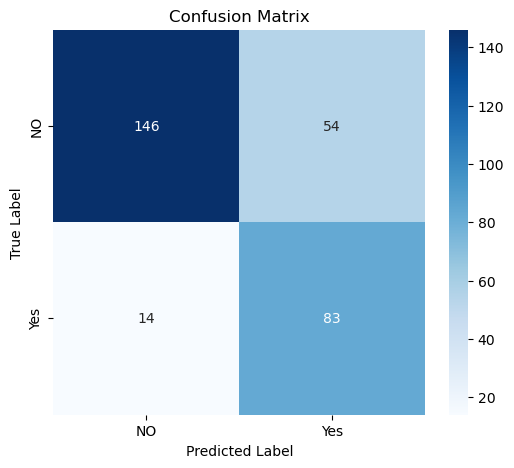

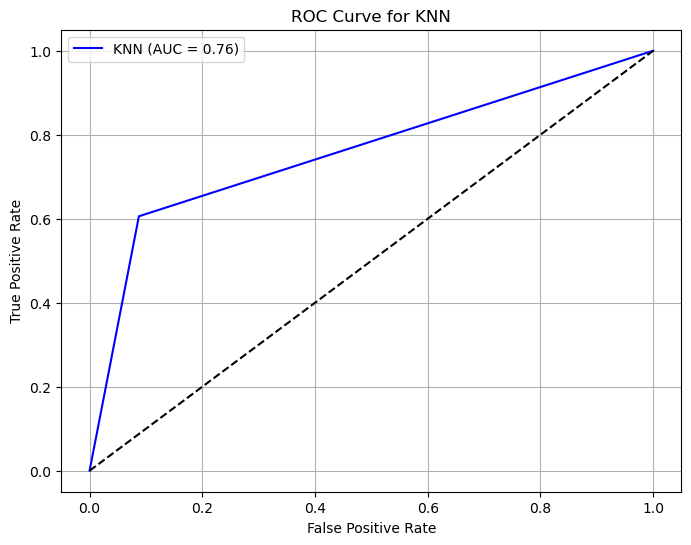

In [26]:
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score

y = heart['AHD'].values
x = heart[['Thal_normal', 'ChestPain_asymptomatic']].values

k = 11
y_predict = []

for i in range(len(x)):
    x0 = x[i]  # test point

    # Remove current point from x and y for leave-one-out validation
    x_temp = np.delete(x, i, axis=0)
    

    # Distance from x0 to all other points
    d = np.linalg.norm(x_temp - x0, axis = 1)

    # Find k-nearest neighbors
    nearest_neighbors = np.argsort(d)[:k]

    # Get their labels
    majority_vote = Counter(y[nearest_neighbors]).most_common(1)[0][0]
    x_temp = np.append(x_temp, x0)
    y_predict.append(majority_vote)

# Accuracy
accr = accuracy_score(y, y_predict)
print(f"Accuracy: {accr*100:.2f}%")

#Confusion matrix 
confs_mtx = confusion_matrix(y_predict, y)
Y_pre7 = y_predict
#ploting of confusion matrix
# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confs_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


fpr, tpr, thresholds = roc_curve(y, y_predict)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()

### Multiple K-Nearest Neighbor (***All Predictor and  vs AHD***)
(*x = heart[['Age', 'Sex' , 'ChestPain_typical', 'ChestPain_nontypical', 'ChestPain_nonanginal', 'ChestPain_asymptomatic','RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca',  'Thal_fixed', 'Thal_normal', 'Thal_reversable'*]]
*) <br>
(*y = heart['AHD']*)


* Doing same as multiple KNN just x will be in nd.

**Plotting of the Confusion Matrix :**
* We use confusion matrix to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right.
* We compare the predicted array y_predict with the actual response variable y using a confusion matrix.

**Plotting of Receiver Operating Characterstic(ROC) curve :**
* We use ROC curve to plot the accuracy of the model.
* In which is show that how much model is accurate and how much time model predict wrong and right
* We compare the predicted array y_predict with the actual response variable y using a ROC curve.<br>
   x-axis = False Positive Rate(FPR) <br>
   y-axis = True Positive Rate(TPR)

*What are the results* <br>
The KNN model using all predictor of heart.csv dataset gives  61.95% accuracy to classify AHD.
The results of the KNN model are as follows:

| Feature  |K-value| Accuracy | 
| --- | --- | --- |  
| All Predictor| 12 | 61.95% |




Accuracy: 61.95%


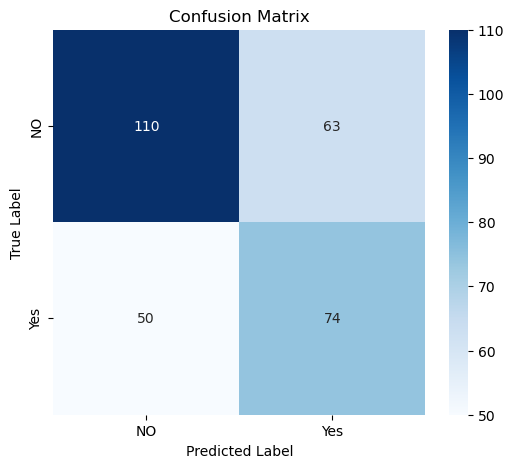

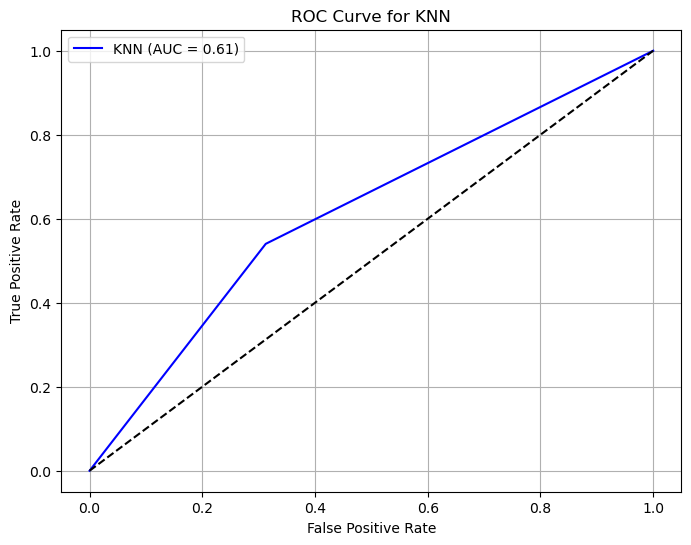

In [27]:



from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score

y = heart['AHD'].values
x = heart[['Age', 'Sex' , 'ChestPain_typical', 'ChestPain_nontypical', 'ChestPain_nonanginal', 'ChestPain_asymptomatic','RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca',  'Thal_fixed', 'Thal_normal', 'Thal_reversable']].values

k = 12
y_predict = []

for i in range(len(x)):
    x0 = x[i]  # test point

    # Remove current point from x and y for leave-one-out validation
    x_temp = np.delete(x, i, axis=0)
    

    # Distance from x0 to all other points
    d = np.linalg.norm(x_temp - x0, axis = 1)

    # Find k-nearest neighbors
    nearest_neighbors = np.argsort(d)[:k]

    # Get their labels
    majority_vote = Counter(y[nearest_neighbors]).most_common(1)[0][0]
    x_temp = np.append(x_temp, x0)
    y_predict.append(majority_vote)

# Accuracy
accr = accuracy_score(y, y_predict)
print(f"Accuracy: {accr*100:.2f}%")

#Confusion matrix 
confs_mtx = confusion_matrix(y_predict, y)
y_pre8 = y_predict

#ploting of confusion matrix
# Define class labels
labels = ['NO', 'Yes']  # Replace with your actual class names if needed

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confs_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_predict)
auc_score = auc(fpr, tpr)

# 6. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='KNN (AUC = %.2f)' % auc_score, color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()


# Model Comparison: Logistic Regression vs. K-Nearest Neighbors (as example Thal_normal Predictor)

| **Aspect**                | **Logistic Regression**                                                              | **K-Nearest Neighbors (KNN)**                                               |
|--------------------------|----------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Type**                 | Parametric, linear classifier                                                         | Non-parametric, lazy learner                                                 |
| **Implementation Logic** | Implemented using likelihood maximization with BFGS optimizer; uses sigmoid function | Custom Euclidean distance function, LOOCV (leave-one-out cross-validation)   |
| **Feature Used**         | `Thal_normal`                                                                         | `Thal_normal`                                                                |
| **Training Time**        | Optimization-based (fast)                                                             | No training phase, but prediction is computationally expensive               |
| **Prediction Time**      | Fast – only a dot product and sigmoid function                                        | Slower – distance computation for each test instance                         |
| **Model Equation**       | $p(x) = \frac{1}{1 + e^{-(b_0 + b_1 \cdot x)}}$                                       | No equation – predicts based on nearest **k=25** neighbors                     |
| **Estimated Coefficients** | $b_0$ and $b_1$ computed via MLE                                                     | Not applicable                                                               |
| **Confidence Intervals** | Yes – calculated using inverse Hessian                                                | Not available                                                                |
| **Interpretability**     | High – can interpret slope and intercept                                              | Low – only nearest labels matter                                             |
| **Accuracy**             | **76.43%**                                                                            | **58.92%**                                                                   |
| **Confusion Matrix**     | Displayed using heatmap                                                               | Displayed using heatmap                                                      |
| **ROC Curve**            | True probabilities from sigmoid function                                              | Approximate probabilities from neighbor votes                                |
| **AUC Score**            | e.g., **0.76**                                                                        | e.g., **0.59** (from `roc_auc_score`)                                        |
| **Best Use Case**        | When linearity and interpretability are important                                     | When data is not linearly separable and more flexible boundaries are needed  |
| **Handling Noise**       | Moderately robust (log-likelihood smooths influence)                                  | Sensitive to outliers in local neighborhood                                  |
|**Prediction Type**  | Predicts probability of class (sigmoid)       | Predicts class by majority vote among neighbors |

## *Simple Logistic regression* vs *Simple K-Nearest Neighbor*


#### Conclusion of Simple model comparesion <br>

|S. No.|Simple Logistic Regression| Simple KNN|
|--|----|------|
|1.|  In simple logistic regression predicting the probability of predictor value using sigmoid function for prediction and estimating the model coefficient bo and b1 by maximizing log_likelihood function   |  KNN is Non-parametric means no need to assume model initially no training can say lazy training , predicting on the basis of given dataset   |
|2.|In simple logistic regression we use sigmoid function for getting the probability and on the basis of probability we predict if it is greater than 0.5 true else false| KNN use distance of the k nearest point of the test point and corresponding that majority of that y value give the predicted outcome of test point x0. |
|3.|Simple logistic regression is used for binary classification problem | KNN is used for both classification and regression.|
|4.|Logistic regression required initial guess of model if it's wrong that can lead wrong model hence lead wrong prediction.|KNN work on basis of given dataset no initial guess, prediction on K-nearest points.|
||**Confusion Matrix Comparison**||
|4.|Logistic Regression gave higher accuracy (around 76%) for both Thal_normal and ChestPain_asymptomatic features.| KNN showed lower accuracy (around 59%) even with tuning of k values (k=25 and k=16).|
||**ROC Curve and AUC Comparison**||
|5.|Logistic Regression showed higher AUC values in both feature comparisons, which means it had a better balance between sensitivity and specificity than KNN.||


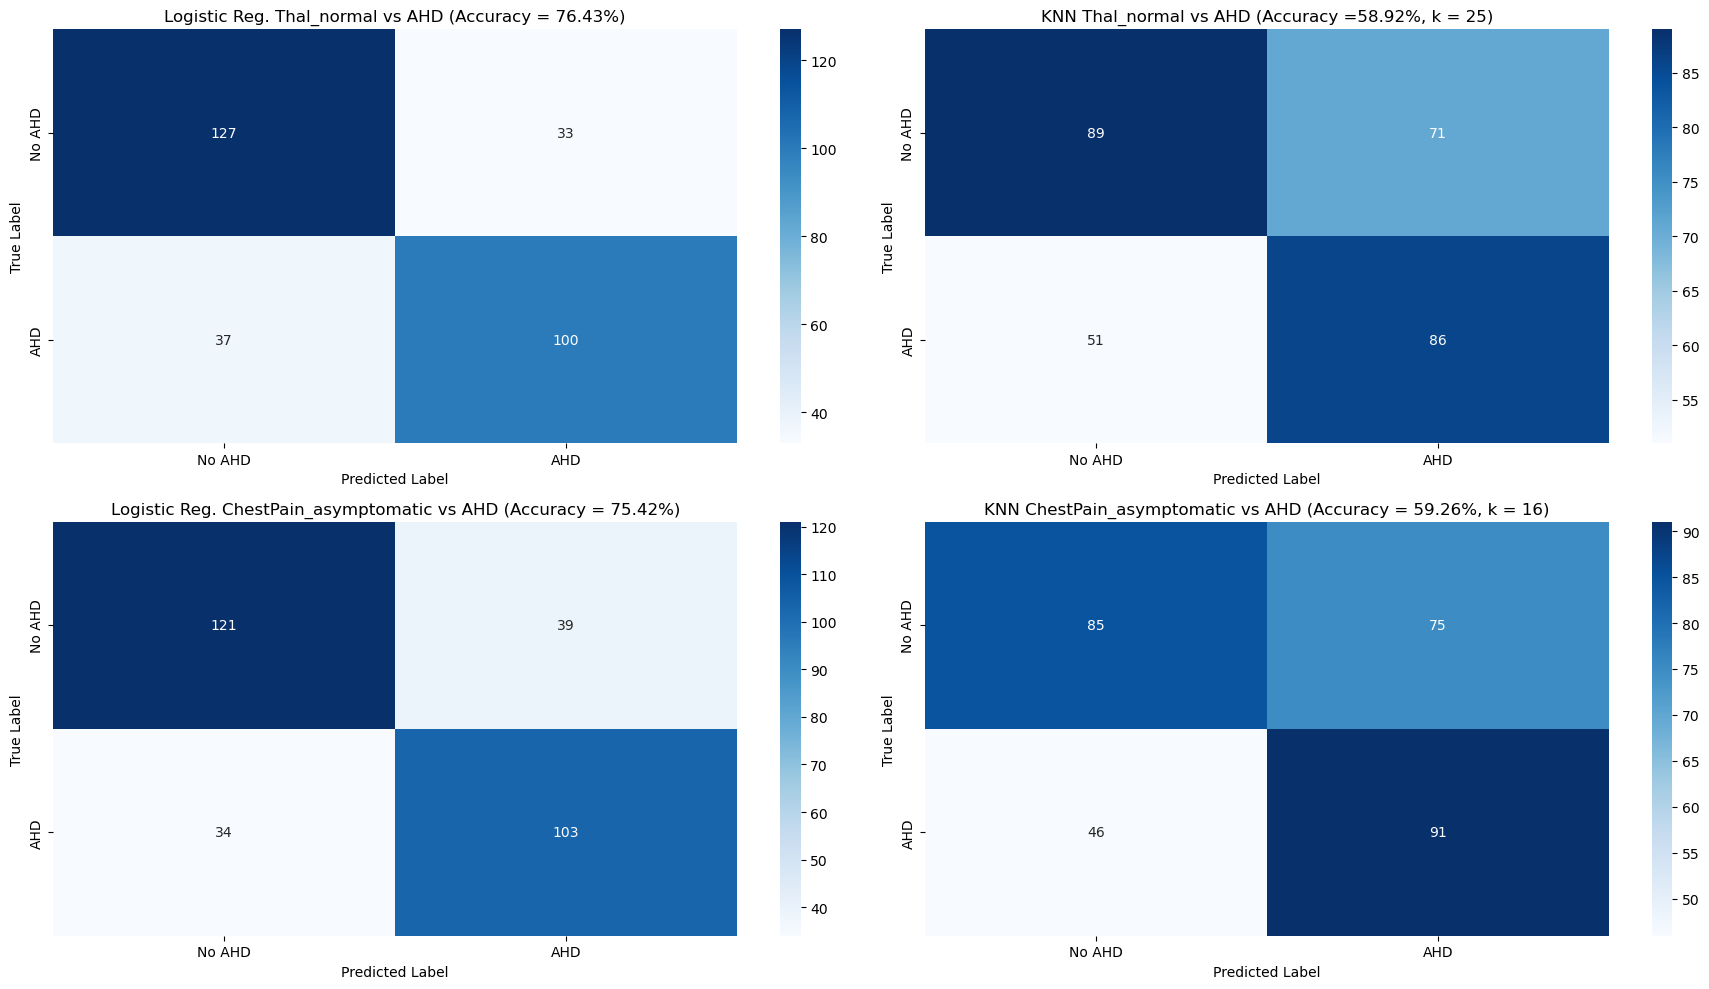

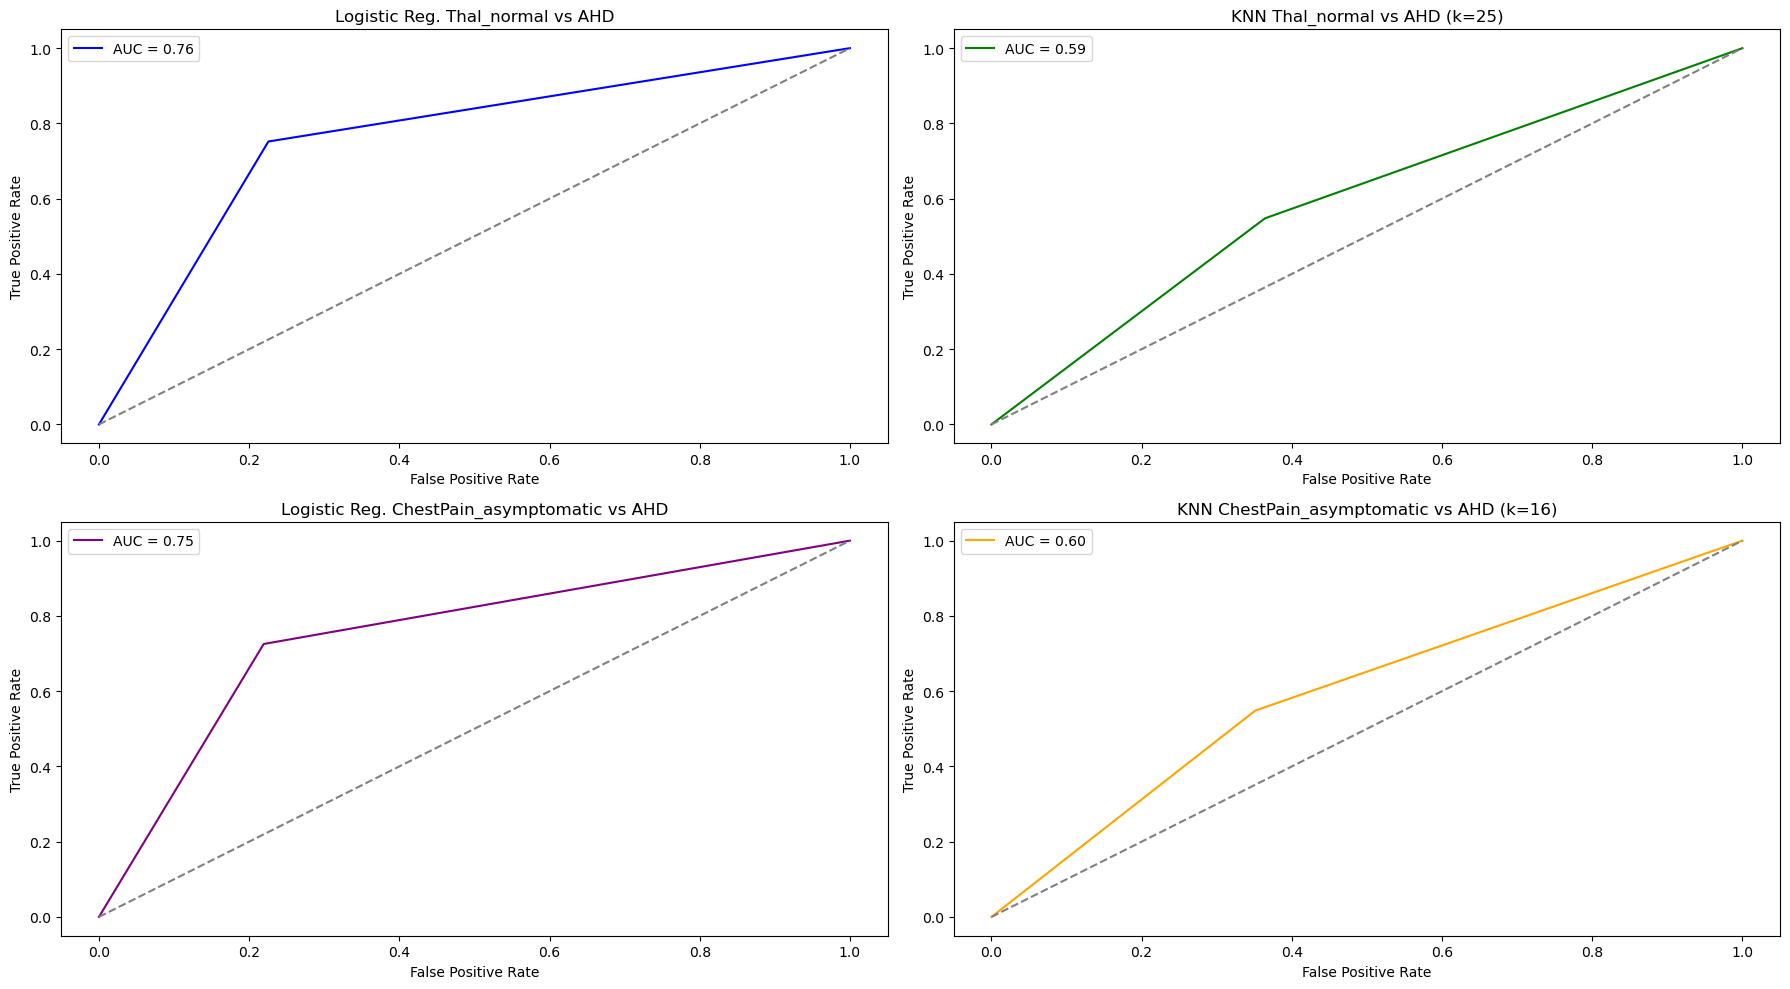

In [38]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



y = heart['AHD'].values

# Confusion matrices
confs_mtx1 = confusion_matrix(y, y_pre1)
confs_mtx2 = confusion_matrix(y, y_pre2)
confs_mtx5 = confusion_matrix(y, y_pre5)
confs_mtx6 = confusion_matrix(y, y_pre6)

labels = ['No AHD', 'AHD']  # class labels

# Plotting
f, ax = subplots(2, 2, figsize=(18, 10))

sns.heatmap(confs_mtx1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0, 0])
ax[0, 0].set_xlabel('Predicted Label')
ax[0, 0].set_ylabel('True Label')
ax[0, 0].set_title('Logistic Reg. Thal_normal vs AHD (Accuracy = 76.43%)')

sns.heatmap(confs_mtx5, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0, 1])
ax[0, 1].set_xlabel('Predicted Label')
ax[0, 1].set_ylabel('True Label')
ax[0, 1].set_title('KNN Thal_normal vs AHD (Accuracy =58.92%, k = 25)')

sns.heatmap(confs_mtx2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[1, 0])
ax[1, 0].set_xlabel('Predicted Label')
ax[1, 0].set_ylabel('True Label')
ax[1, 0].set_title('Logistic Reg. ChestPain_asymptomatic vs AHD (Accuracy = 75.42%)')

sns.heatmap(confs_mtx6, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[1, 1])
ax[1, 1].set_xlabel('Predicted Label')
ax[1, 1].set_ylabel('True Label')
ax[1, 1].set_title('KNN ChestPain_asymptomatic vs AHD (Accuracy = 59.26%, k = 16)')

plt.tight_layout()
plt.show()


#ROC curve comparision

# ROC curve values
fpr1, tpr1, _ = roc_curve(y_pre1, y)  # Logistic Thal_normal
fpr2, tpr2, _ = roc_curve(y_pre2, y)  # Logistic ChestPain_asymptomatic
fpr3, tpr3, _ = roc_curve(y_pre5, y)  # KNN Thal_normal
fpr4, tpr4, _ = roc_curve(y_pre6, y)  # KNN ChestPain_asymptomatic

# AUC scores
auc1 = roc_auc_score(y_pre1, y)
auc2 = roc_auc_score(y_pre2, y)
auc3 = roc_auc_score(y_pre5, y)
auc4 = roc_auc_score(y_pre6, y)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

# Logistic Thal_normal
ax[0, 0].plot(fpr1, tpr1, label=f"AUC = {auc1:.2f}", color='blue')
ax[0, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[0, 0].set_title('Logistic Reg. Thal_normal vs AHD')
ax[0, 0].set_xlabel("False Positive Rate")
ax[0, 0].set_ylabel("True Positive Rate")
ax[0, 0].legend()

# KNN Thal_normal
ax[0, 1].plot(fpr3, tpr3, label=f"AUC = {auc3:.2f}", color='green')
ax[0, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[0, 1].set_title('KNN Thal_normal vs AHD (k=25)')
ax[0, 1].set_xlabel("False Positive Rate")
ax[0, 1].set_ylabel("True Positive Rate")
ax[0, 1].legend()

# Logistic ChestPain_asymptomatic
ax[1, 0].plot(fpr2, tpr2, label=f"AUC = {auc2:.2f}", color='purple')
ax[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1, 0].set_title('Logistic Reg. ChestPain_asymptomatic vs AHD')
ax[1, 0].set_xlabel("False Positive Rate")
ax[1, 0].set_ylabel("True Positive Rate")
ax[1, 0].legend()

# KNN ChestPain_asymptomatic
ax[1, 1].plot(fpr4, tpr4, label=f"AUC = {auc4:.2f}", color='orange')
ax[1, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1, 1].set_title('KNN ChestPain_asymptomatic vs AHD (k=16)')
ax[1, 1].set_xlabel("False Positive Rate")
ax[1, 1].set_ylabel("True Positive Rate")
ax[1, 1].legend()

plt.tight_layout()
plt.show()



### *Multiple Logistic regression* vs *Multiple K-Nearest Neighbour*

1. For comparing multiple models, we can follow the same two methods:
    * Confusion Matrix – to compare accuracy and prediction errors.
    * ROC Curve – to evaluate performance based on probability thresholds and compute AUC.<br>
    
This gives a complete picture of how models are performing, both in terms of classification and how confidently they classify.

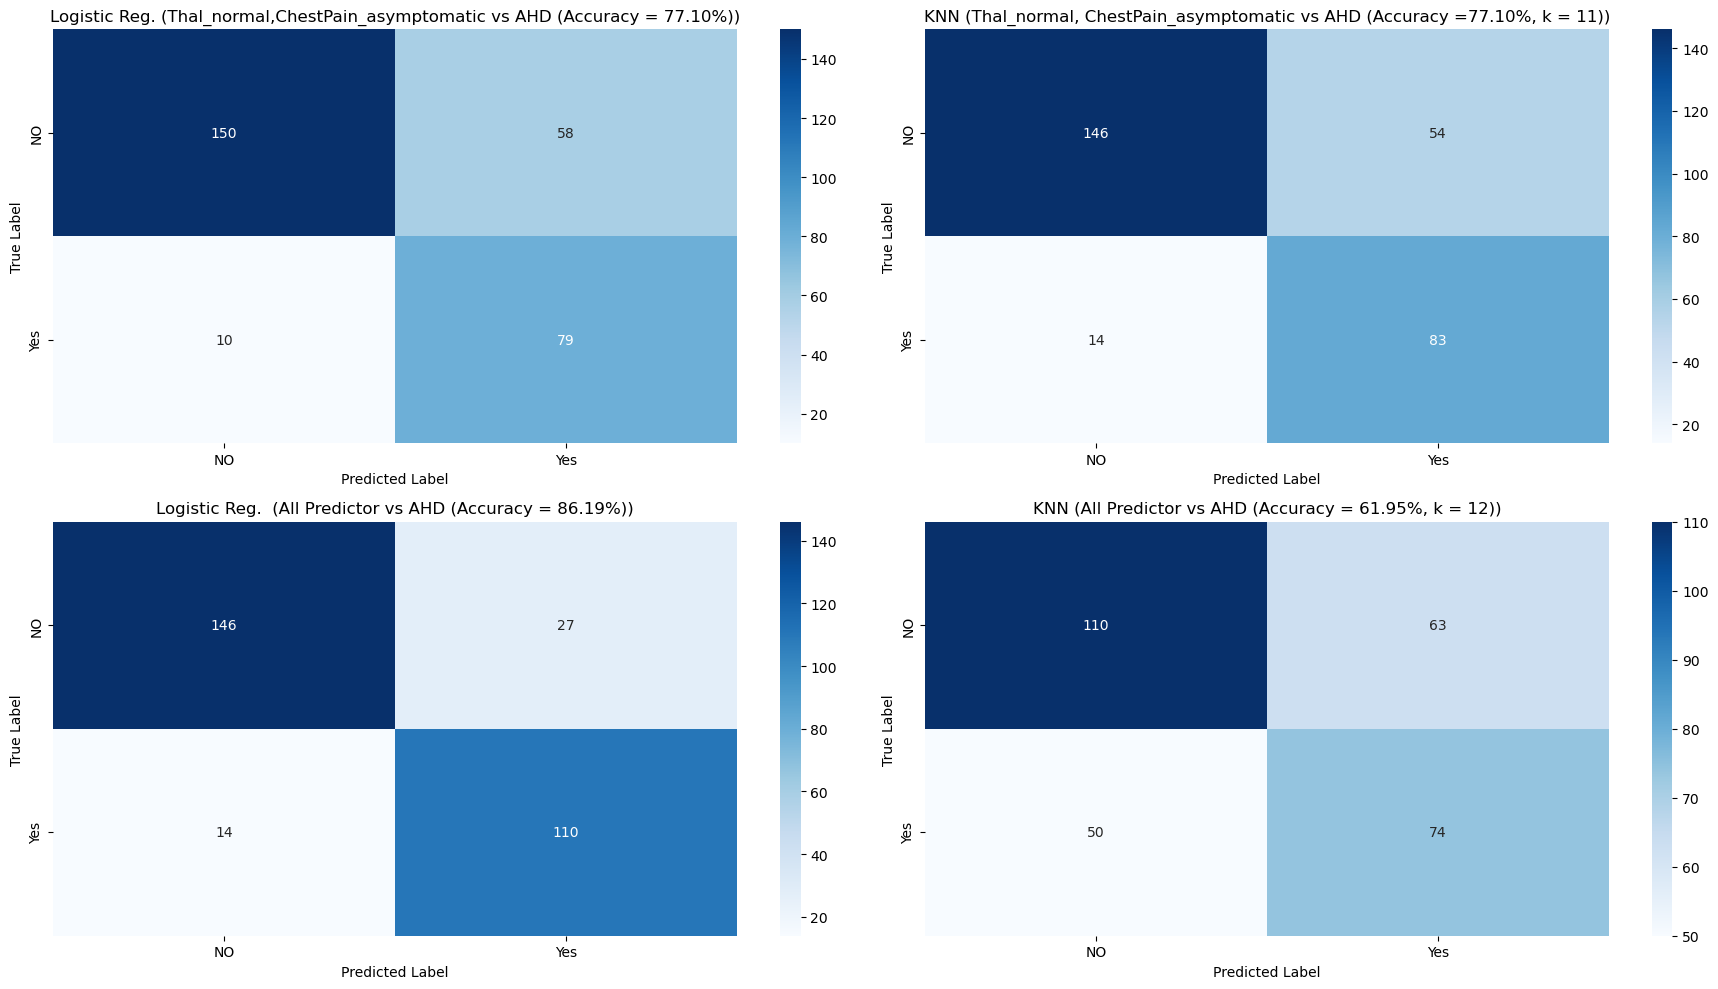

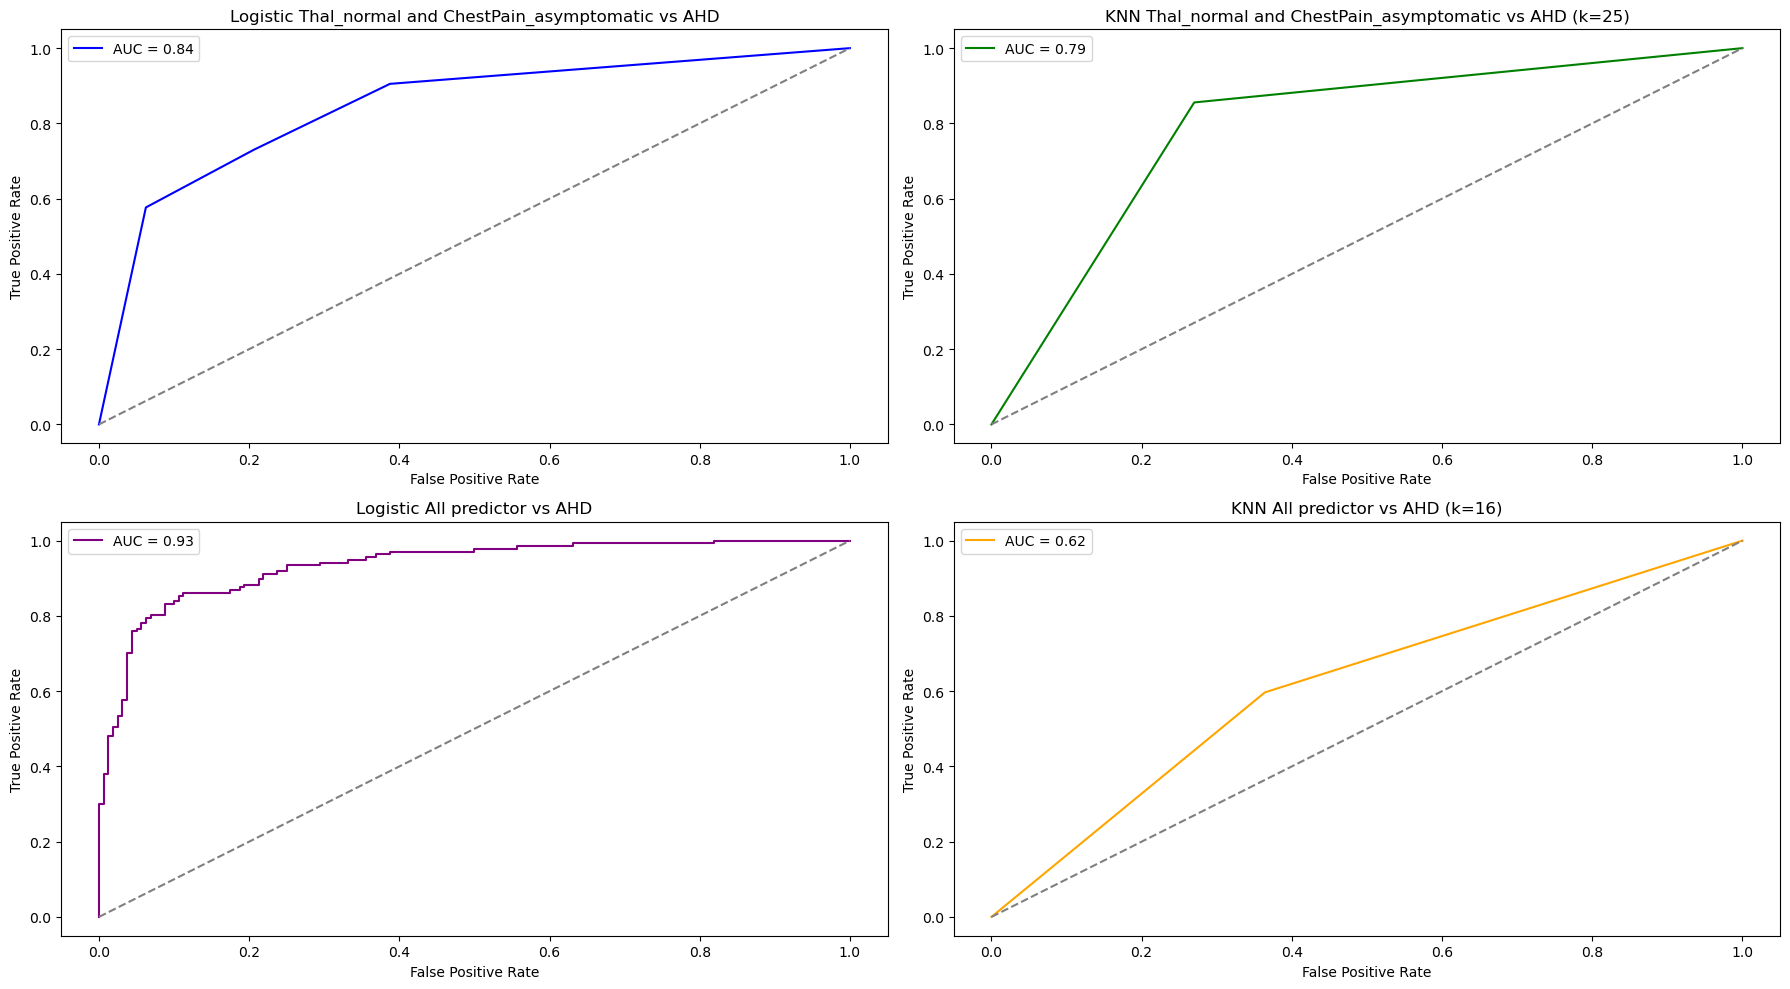

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

confs_mtx3 = confusion_matrix(y_pre3, y)
confs_mtx4 = confusion_matrix(y_pre4, y)
confs_mtx7 = confusion_matrix(Y_pre7, y)
confs_mtx8 = confusion_matrix(y_pre8, y)


# Plotting
f, ax = subplots(2, 2, figsize=(18, 10))

sns.heatmap(confs_mtx3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0, 0])
ax[0, 0].set_xlabel('Predicted Label')
ax[0, 0].set_ylabel('True Label')
ax[0, 0].set_title('Logistic Reg. (Thal_normal,ChestPain_asymptomatic vs AHD (Accuracy = 77.10%))')

sns.heatmap(confs_mtx7, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0, 1])
ax[0, 1].set_xlabel('Predicted Label')
ax[0, 1].set_ylabel('True Label')
ax[0, 1].set_title('KNN (Thal_normal, ChestPain_asymptomatic vs AHD (Accuracy =77.10%, k = 11))')

sns.heatmap(confs_mtx4, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[1, 0])
ax[1, 0].set_xlabel('Predicted Label')
ax[1, 0].set_ylabel('True Label')
ax[1, 0].set_title('Logistic Reg.  (All Predictor vs AHD (Accuracy = 86.19%))')

sns.heatmap(confs_mtx8, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[1, 1])
ax[1, 1].set_xlabel('Predicted Label')
ax[1, 1].set_ylabel('True Label')
ax[1, 1].set_title('KNN (All Predictor vs AHD (Accuracy = 61.95%, k = 12))')

plt.tight_layout()
plt.show()


#ROC curve comparision

# ROC curve values
fpr1, tpr1, _ = roc_curve( y, y_prob3)  # Logistic Thal_normal and ChestPain_asymptomatic
fpr2, tpr2, _ = roc_curve(y,y_prob4)  # Logistic All predictor
fpr3, tpr3, _ = roc_curve(Y_pre7, y)  # KNN Thal_normal and ChestPain_asymptomatic
fpr4, tpr4, _ = roc_curve(y_pre8, y)  # KNN All predictor

# AUC scores
auc1 = roc_auc_score(y,y_prob3)
auc2 = roc_auc_score(y,y_prob4)
auc3 = roc_auc_score(Y_pre7, y)
auc4 = roc_auc_score(y_pre8, y)

# Plotting
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

# Logistic Thal_normal
ax[0, 0].plot(fpr1, tpr1, label=f"AUC = {auc1:.2f}", color='blue')
ax[0, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[0, 0].set_title('Logistic Thal_normal and ChestPain_asymptomatic vs AHD')
ax[0, 0].set_xlabel("False Positive Rate")
ax[0, 0].set_ylabel("True Positive Rate")
ax[0, 0].legend()

# KNN Thal_normal
ax[0, 1].plot(fpr3, tpr3, label=f"AUC = {auc3:.2f}", color='green')
ax[0, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[0, 1].set_title('KNN Thal_normal and ChestPain_asymptomatic vs AHD (k=25)')
ax[0, 1].set_xlabel("False Positive Rate")
ax[0, 1].set_ylabel("True Positive Rate")
ax[0, 1].legend()

# Logistic ChestPain_asymptomatic
ax[1, 0].plot(fpr2, tpr2, label=f"AUC = {auc2:.2f}", color='purple')
ax[1, 0].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1, 0].set_title('Logistic All predictor vs AHD')
ax[1, 0].set_xlabel("False Positive Rate")
ax[1, 0].set_ylabel("True Positive Rate")
ax[1, 0].legend()

# KNN ChestPain_asymptomatic
ax[1, 1].plot(fpr4, tpr4, label=f"AUC = {auc4:.2f}", color='orange')
ax[1, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[1, 1].set_title('KNN All predictor vs AHD (k=16)')
ax[1, 1].set_xlabel("False Positive Rate")
ax[1, 1].set_ylabel("True Positive Rate")
ax[1, 1].legend()

plt.tight_layout()
plt.show()

## Conclusion: Logistic Regression vs KNN

|  Criteria                         |  Logistic Regression                          |  K-Nearest Neighbors (KNN)                      |
|-----------------------------------|------------------------------------------------|--------------------------------------------------|
|  Type of Model                  | Linear, Parametric                            | Non-linear, Non-parametric                      |
|  Training Time                  | **Fast** (simple function fitting)            | No training period             |
|  Prediction Time                | **Fast**                                      | **Slow** (distance calculation at runtime)      |
|  Interpretability               | **High** – coefficients show feature impact   | **Low** – decisions are based on proximity only |
|  Sensitive to Feature Scaling   | Less sensitive                                | **Highly sensitive**                            |
|  Noise Sensitivity              | Less sensitive                                | **More sensitive** to noise and outliers        |
|  Works Well On                 | Linearly separable data                       | Data with **complex, non-linear boundaries**    |
|  ROC-AUC Performance            | Generally smooth and good                     | May be jagged but effective                     |

###  Final Decision:
- Use **Logistic Regression** if:
  - If data is linearly separable
  - If want speed, interpretability.

- Use **KNN** if:
  - If data has complex, non-linear boundaries
  - If want a model that adapts easily to data shape
